<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Zomato Restaurant Project</h1>

<h2 style="color: red; padding: 10px; text-align: left;">Project Description</h2>

Zomato Data Analysis is aimed at helping food enthusiasts discover the best cuisines within their budget worldwide. The analysis identifies value-for-money restaurants, offers insights into popular cuisines by country, and locates areas with the highest restaurant density.

### Data Storage

This project uses two datasets:

- [Country Code Dataset](https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx)
- [Zomato Dataset](https://github.com/dsrscientist/dataset4/blob/main/zomato.csv)

This project uses two datasets: `Zomato.csv` and `country_code.csv`.

- `country_code.csv`:
  - Country code
  - Country name

- `Zomato.csv`:
  - Restaurant Id
  - Restaurant Name
  - Country Code
  - City
  - Address
  - Locality
  - Locality Verbose
  - Longitude
  - Latitude
  - Cuisines
  - Average Cost for two
  - Currency
  - Has Table booking
  - Has Online delivery
  - Is delivering
  - Switch to order menu
  - Price range
  - Aggregate Rating
  - Rating color
  - Rating text
  - Votes

### Problem Statement

Predict the following from the dataset:

1. Average Cost for two
2. Price range

**Hint**: Use pandas merge operation (`pd.merge(df1, df2)`) to combine the two datasets.

<h2 style="color: red; padding: 10px; text-align: left;">Importing Necesssary Liraries</h2>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

<h2 style="color: red; padding: 10px; text-align: left;"> Data Acquisition</h2>

In [4]:
   #Loading csv file of Zomato
filepath="https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv"
df1 = pd.read_csv(filepath, encoding='latin1')

# Loading xlx file of country code
df2 = pd.read_excel("C:/Users/Mahima/Downloads/Country-Code.xlsx")

# Loading the entire dataset
df = pd.merge(df2, df1,how='left',on='Country Code')
df         

Country Code        Country  Restaurant ID  \
0                1          India        3400025   
1                1          India        3400341   
2                1          India        3400005   
3                1          India        3400021   
4                1          India        3400017   
...            ...            ...            ...   
9546           216  United States       17697389   
9547           216  United States       17697424   
9548           216  United States       17697332   
9549           216  United States       17694056   
9550           216  United States       17559793   

                               Restaurant Name            City  \
0                                   Jahanpanah            Agra   
1                          Rangrezz Restaurant            Agra   
2                      Time2Eat - Mama Chicken            Agra   
3        Chokho Jeeman Marwari Jain Bhojanalya            Agra   
4                               Pinch Of Spice            Agra   
...                                        ...             ...   
9546                       The Screaming Eagle        Waterloo   
9547                             The Thai Bowl        Waterloo   
9548                Tokyo Japanese Steak House        Waterloo   
9549  Theo Yianni's Authentic Greek Restaurant         Weirton   
9550                 Fishpatrick's Crabby Cafe  Winchester Bay   

                                                Address        Locality  \
0     E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...      Agra Cantt   
1     E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...      Agra Cantt   
2           Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra Cantt   
3     1/48, Delhi Gate, Station Road, Raja Mandi, Ci...     Civil Lines   
4     23/453, Opposite Sanjay Cinema, Wazipura Road,...     Civil Lines   
...                                                 ...             ...   
9546                  228 E 4th St., Waterloo, IA 50703        Waterloo   
9547            624 Sycamore Street, Waterloo, IA 50703        Waterloo   
9548              1931 Sears Street, Waterloo, IA 50702        Waterloo   
9549                322 American Way, Weirton, WV 26062         Weirton   
9550        196 Bayfront Loop, Winchester Bay, OR 97467  Winchester Bay   

                    Locality Verbose   Longitude   Latitude  ...  \
0                   Agra Cantt, Agra   78.011544  27.161661  ...   
1                   Agra Cantt, Agra    0.000000   0.000000  ...   
2                   Agra Cantt, Agra   78.011608  27.160832  ...   
3                  Civil Lines, Agra   77.998092  27.195928  ...   
4                  Civil Lines, Agra   78.007553  27.201725  ...   
...                              ...         ...        ...  ...   
9546              Waterloo, Waterloo  -92.335523  42.498400  ...   
9547              Waterloo, Waterloo  -92.335769  42.497919  ...   
9548              Waterloo, Waterloo  -92.323400  42.465580  ...   
9549                Weirton, Weirton  -80.529488  40.396043  ...   
9550  Winchester Bay, Winchester Bay -124.175346  43.678998  ...   

                Currency  Has Table booking Has Online delivery  \
0     Indian Rupees(Rs.)                 No                  No   
1     Indian Rupees(Rs.)                 No                  No   
2     Indian Rupees(Rs.)                 No                  No   
3     Indian Rupees(Rs.)                 No                  No   
4     Indian Rupees(Rs.)                 No                  No   
...                  ...                ...                 ...   
9546           Dollar($)                 No                  No   
9547           Dollar($)                 No                  No   
9548           Dollar($)                 No                  No   
9549           Dollar($)                 No                  No   
9550           Dollar($)                 No                  No   

     Is delivering now Switch to order menu Price range Aggregate

<h2 style="color: red; padding: 10px; text-align: left;">Data Description</h2>

In [5]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

# DataFrame Summary

- The dataframe comprises 9551 rows and 22 columns.
- There are three datatypes in the dataframe:
  - Float64: 3 columns
  - Int64: 5 columns
  - Object: 14 columns
- Initial inspection shows there are no missing values in any of the columns.

In [8]:
df.duplicated().sum()

0

In [9]:
# Checking for Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                      Missing Values  % Missing data
Cuisines                           9        0.094231
Country Code                       0        0.000000
Currency                           0        0.000000
Rating text                        0        0.000000
Rating color                       0        0.000000
Aggregate rating                   0        0.000000
Price range                        0        0.000000
Switch to order menu               0        0.000000
Is delivering now                  0        0.000000
Has Online delivery                0        0.000000
Has Table booking                  0        0.000000
Average Cost for two               0        0.000000
Country                            0        0.000000
Latitude                           0        0.000000
Longitude                          0        0.000000
Locality Verbose                   0        0.000000
Locality                           0        0.000000
Address                            0        0.

In [10]:
# Fixing Missing Values
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

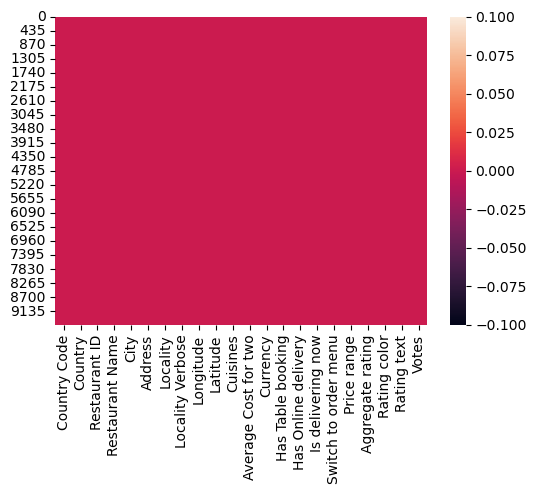

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

In [13]:
# Checking value counts 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64
**************************************************
Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
**************************************************
Restaurant ID
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64
**************************************************
Restaurant Name
Cafe Cof

In [14]:
# Dropping redundant columns
df.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude','Switch to order menu' ], axis=1, inplace=True)
df.shape

(9551, 16)

# Dataset Overview

- Original dataset: 9551 rows, 22 columns.
- Redundant columns dropped: 'Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude'.
- Current dataset: 9551 rows, 16 columns.

### Key Findings:

- 'Country Code': India (code: 1) most represented.
- 'Country': Provides descriptive country names.
- 'Restaurant Name': "Cafe Coffee Day" most prevalent.
- 'City': New Delhi has the highest representation.
- 'Locality' and 'Locality Verbose': Detailed location information.
- 'Cuisines': "North Indian" most common.
- 'Average Cost for Two': Most common cost is 500.
- 'Currency': Indian Rupees (Rs.) predominant.
- 'Has Table Booking' and 'Has Online Delivery': Majority don't have table booking; significant number offer online delivery.
- 'Price Range': 1 is the most common.
- 'Aggregate Rating': Many restaurants have an average rating of 0.0.
- 'Rating Color' and 'Rating Text': Distribution of colors and descriptive text.
- 'Votes': Many restaurants have 0 votes.

These observations set the stage for further analysis and modeling.

In [15]:
# Separating Numerical & Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64']).columns

print(f"We have {len(categorical_columns)} categorical columns in our dataframe")
print('Categorical columns are: ',categorical_columns)
print('\n')
print("We have {} numerical columns in our dataframe".format(len(numerical_columns)))
print('Numerical_columns are: ',numerical_columns)

We have 11 categorical columns in our dataframe
Categorical columns are:  Index(['Country', 'Restaurant Name', 'City', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Rating color', 'Rating text'],
      dtype='object')


We have 4 numerical columns in our dataframe
Numerical_columns are:  Index(['Country Code', 'Average Cost for two', 'Price range', 'Votes'], dtype='object')


In [16]:
df.describe()

Country Code  Average Cost for two  Price range  Aggregate rating  \
count   9551.000000           9551.000000  9551.000000       9551.000000   
mean      18.365616           1199.210763     1.804837          2.666370   
std       56.750546          16121.183073     0.905609          1.516378   
min        1.000000              0.000000     1.000000          0.000000   
25%        1.000000            250.000000     1.000000          2.500000   
50%        1.000000            400.000000     2.000000          3.200000   
75%        1.000000            700.000000     2.000000          3.700000   
max      216.000000         800000.000000     4.000000          4.900000   

              Votes  
count   9551.000000  
mean     156.909748  
std      430.169145  
min        0.000000  
25%        5.000000  
50%       31.000000  
75%      131.000000  
max    10934.000000

# Statistical Insights

### Country Code:

- 'Country Code' ranges from 1 to 216, with the majority (average 18.37) indicating India (code: 1).
- High standard deviation (56.75) suggests significant variability in country codes.

### Average Cost for Two:

- 'Average Cost for Two' varies widely (0 to 800,000), with a mean of 1199.21.
- High standard deviation (16121.18) indicates substantial variation.
- 75th percentile: Majority of restaurants have an average cost for two of 700 or less.

### Price Range:

- 'Price Range' ranges from 1 to 4, with a mean of approximately 1.80.
- Moderate variability (standard deviation: 0.91).
- Majority of restaurants fall within price range 1 or 2.

### Aggregate Rating:

- 'Aggregate Rating' ranges from 0 to 4.9, with an average of approximately 2.67.
- Standard deviation (1.52) indicates variability.
- 25th percentile: Rating of 2.5, 75th percentile: Rating of 3.7.

### Votes:

- 'Votes' range from 0 to 10,934, mean of 156.91.
- Considerable standard deviation (430.17), indicating a wide range.
- Majority of restaurants have lower votes (25th percentile: 5 votes, median: 31 votes).

These statistical summaries offer insights into the distribution and variability of key columns, guiding further exploration and analysis.

<h2 style="color: red; padding: 10px; text-align: left;">Data Visualization</h2>

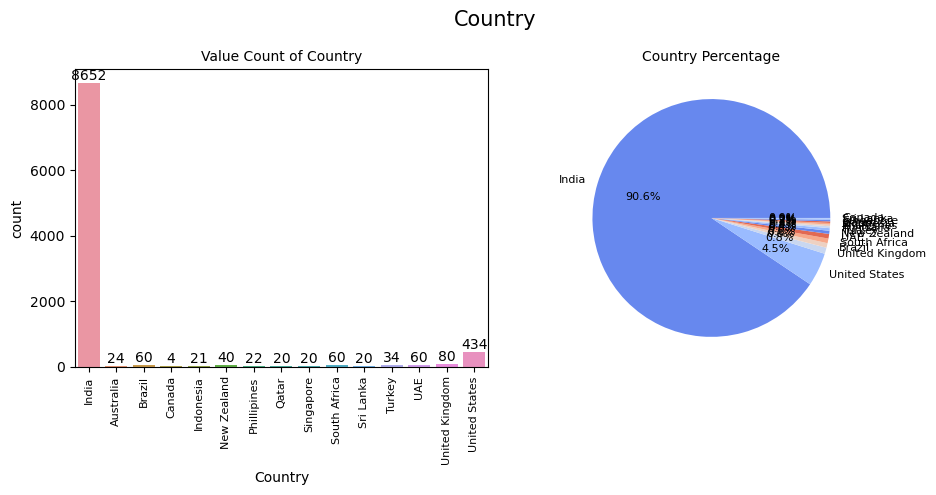

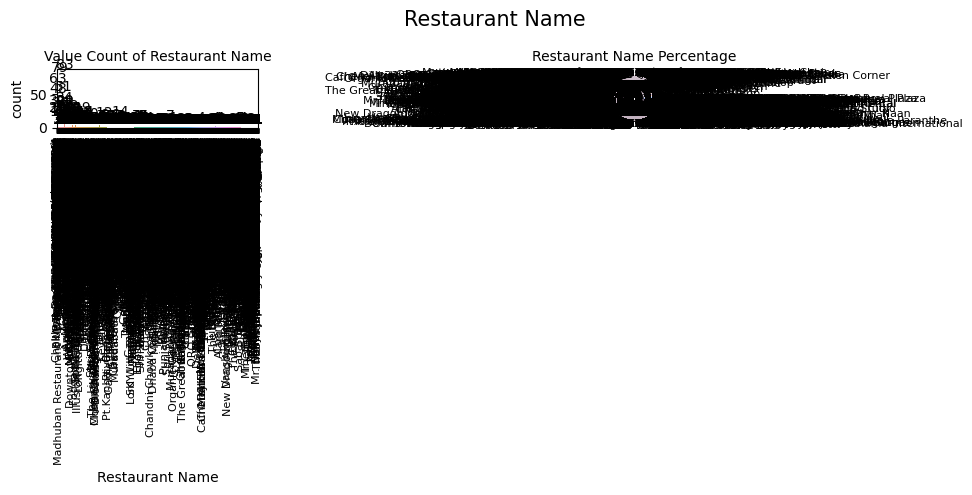

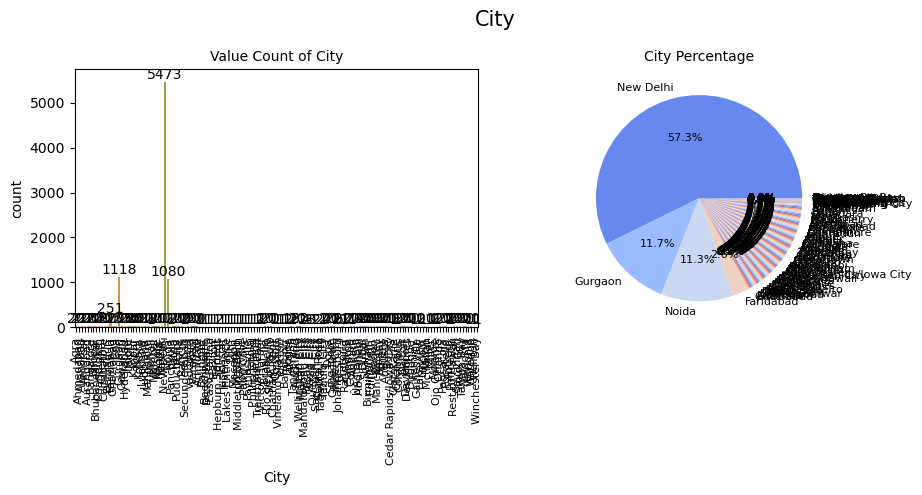

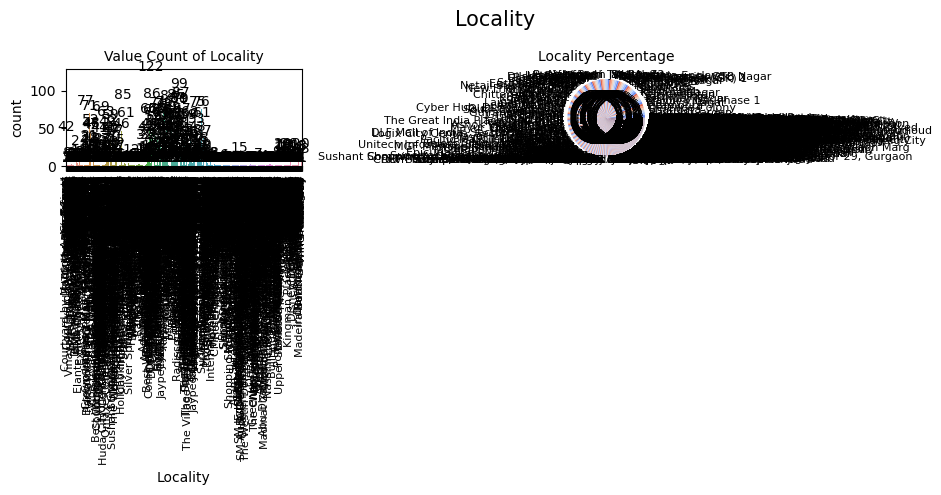

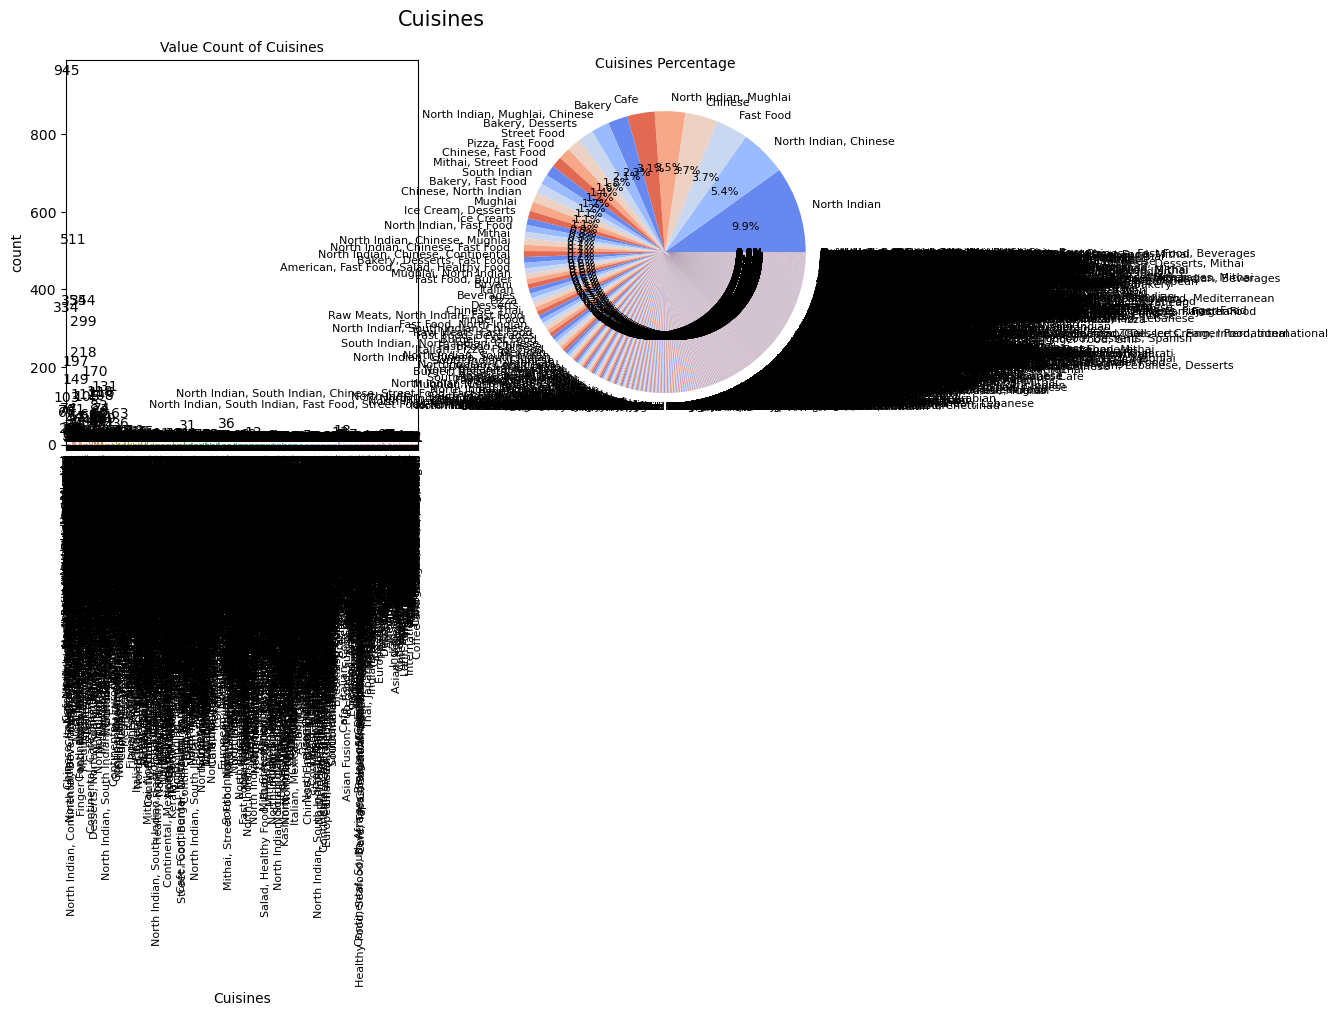

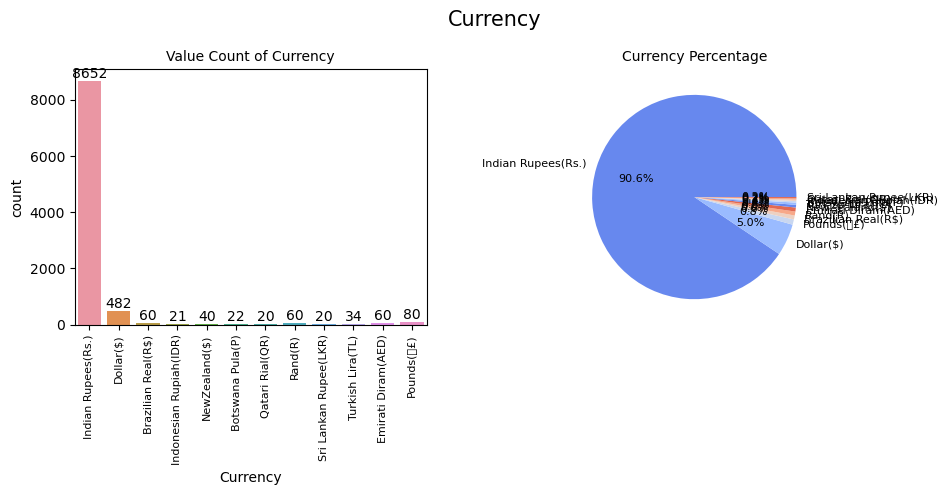

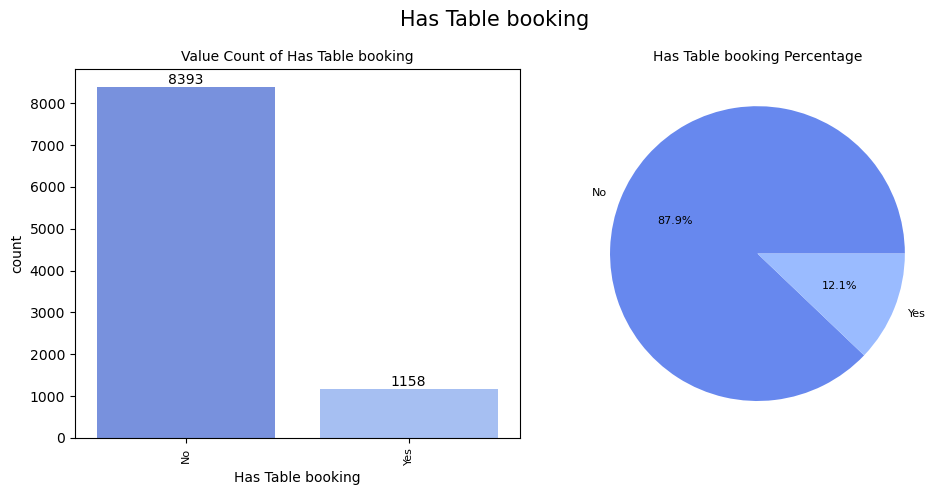

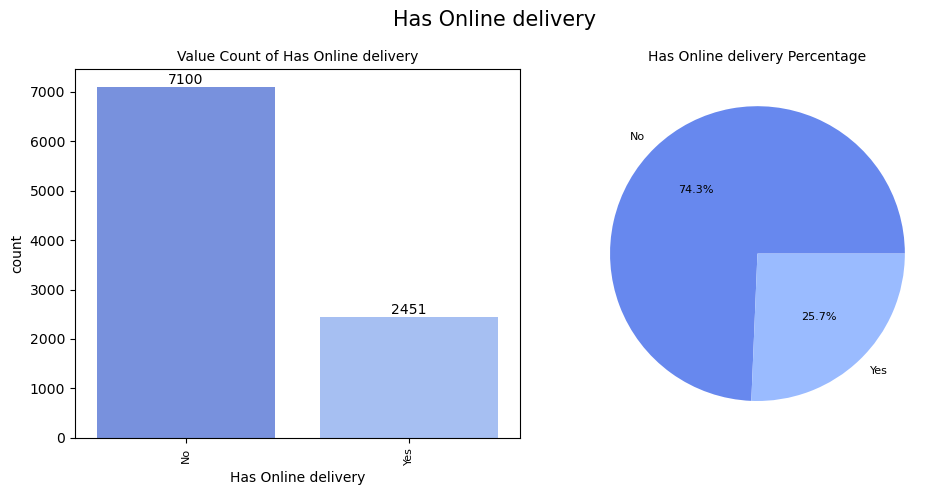

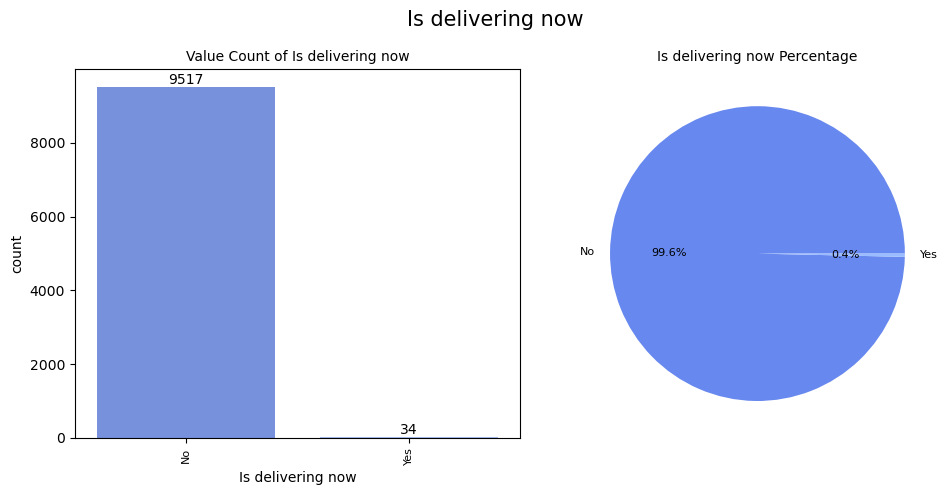

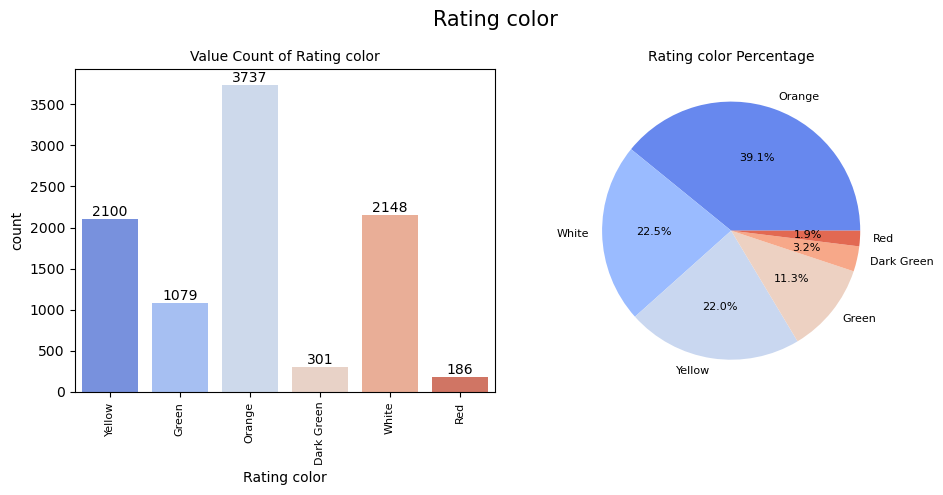

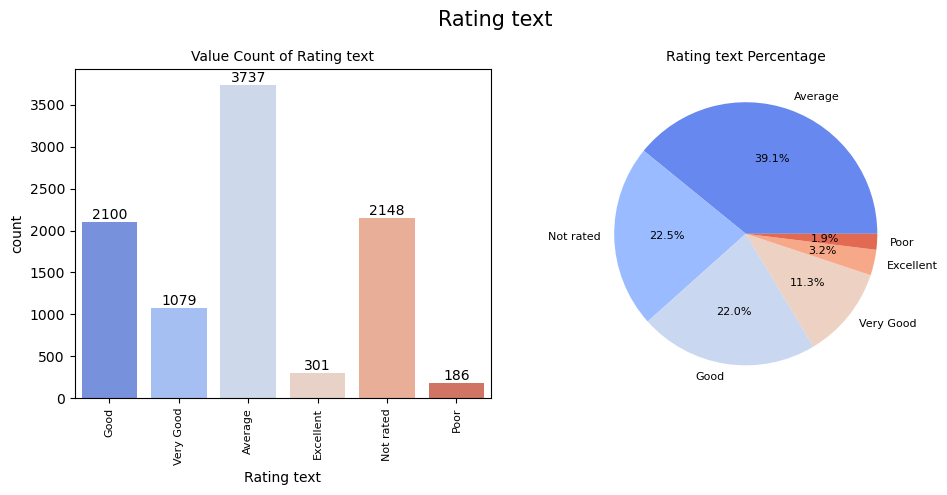

In [18]:
# Univariate analysis on categorical columns
for i, column in enumerate(categorical_columns):
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')
    
    sns.set_palette("coolwarm")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', textprops={'fontsize': 8}, colors=sns.color_palette("coolwarm"))
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    # Set text color for the title
    fig.suptitle(column, fontsize=15, color='black')
    
    plt.tight_layout()
    plt.show()

# Categorical Variable Insights

### Country:
- Predominantly Indian restaurants (90.59%).
- Other countries contribute, with the United States (4.54%), United Kingdom (0.84%), Brazil (0.63%), and UAE (0.63%).

### Restaurant Name:
- Diverse names (7446 unique).
- Most names occur once.
- Popular names include "Cafe Coffee Day," "Domino's Pizza," and "Subway."

### City:
- Restaurants from 141 cities.
- New Delhi has the highest representation (5473).
- Some cities have a small restaurant count.

### Locality:
- Restaurants from 1208 localities.
- Varying concentration levels.

### Cuisines:
- Diverse cuisines (1825 unique).
- "North Indian" most common, followed by "Chinese" and "Fast Food."
- Many cuisines occur once.

### Currency:
- Majority use Indian Rupees (90.59%).
- Dollar ($) and Pounds (Œ£) also used.
- Some countries use their currencies.

### Has Table Booking:
- 87.88% of restaurants don't offer table booking.
- 12.12% provide this option.

### Has Online Delivery:
- 74.34% of restaurants don't offer online delivery.
- 25.66% provide online delivery.

### Is Delivering Now:
- 99.64% of restaurants not delivering.
- 0.36% currently deliver.

### Switch to Order Menu:
- All restaurants lack a "Switch to Order Menu" option.

### Rating Color:
- Colors represent ratings.
- "Orange" most common, followed by "White" and "Yellow."

### Rating Text:
- Most common text: "Average," followed by "Not rated," "Good," and "Very Good."
- "Excellent" and "Poor" less common.


In [19]:
# Univariate Analysis on our first Target (Average Cost for two)
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64

In [20]:
# finding details about minimum and maximum Average Cost for Two
print('Minimum Capacity of Average Cost for Two:',df['Average Cost for two'].min())
print('Maximum Capacity of Average Cost for Two:',df['Average Cost for two'].max())

Minimum Capacity of Average Cost for Two: 0
Maximum Capacity of Average Cost for Two: 800000


In [21]:
# checking min & maximum Cost for Two in our dataframe
df.loc[(df['Average Cost for two'] == 800000) | (df['Average Cost for two'] == 0)]

Country Code        Country                 Restaurant Name       City  \
10               1          India     The Latitude - Radisson Blu       Agra   
13               1          India                 Sheroes Hangout       Agra   
15               1          India                  Chapter 1 Cafe       Agra   
53               1          India                  The BrewMaster  Allahabad   
227              1          India            BMG - All Day Dining   Dehradun   
1740             1          India   Atmosphere Grill Cafe Sheesha     Kanpur   
1744             1          India                      UrbanCrave     Kanpur   
8618             1          India              Deena Chat Bhandar   Varanasi   
8630             1          India                 VNS Live Studio   Varanasi   
8747            94      Indonesia                            Skye    Jakarta   
8748            94      Indonesia        Satoo - Hotel Shangri-La    Jakarta   
9119           216  United States                   Cookie Shoppe     Albany   
9120           216  United States   El Vaquero Mexican Restaurant     Albany   
9122           216  United States  Pearly's Famous Country Cookng     Albany   
9232           216  United States                        Deorio's   Columbus   
9270           216  United States                          Azteca  Davenport   
9306           216  United States   Happy Joe's Pizza & Ice Cream    Dubuque   
9363           216  United States            HI Lite Bar & Lounge     Miller   
9409           216  United States                     Royal Hotel  Pocatello   
9419           216  United States                   Senor Iguanas  Pocatello   

                           Locality  \
10            Radisson Blu, Tajganj   
13                          Tajganj   
15                          Tajganj   
53                      Civil Lines   
227                          Jakhan   
1740                      Mall Road   
1744                         Parade   
8618               Dashaswmedh Road   
8630                          Sigra   
8747  Grand Indonesia Mall, Thamrin   
8748     Hotel Shangri-La, Sudirman   
9119                         Albany   
9120                         Albany   
9122                         Albany   
9232                       Columbus   
9270                      Davenport   
9306                        Dubuque   
9363                         Miller   
9409               Lava Hot Springs   
9419                      Pocatello   

                                               Cuisines  Average Cost for two  \
10                   North Indian, Chinese, Continental                     0   
13                          Cafe, North Indian, Chinese                     0   
15    Cafe, Italian, Mexican, North Indian, Continental                     0   
53                       North Indian, Chinese, Italian                     0   
227                    Chinese, North Indian, Fast Food                     0   
1740                       Indian, Chinese, Continental                     0   
1744  Cafe, Continental, Desserts, Ice Cream, Italia...                     0   
8618                                        Street Food                     0   
8630                              Chinese, North Indian                     0   
8747                               Italian, Continental                800000   
8748                         Asian, Indonesian, Western                800000   
9119                                       North Indian                     0   
9120                                            Mexican                     0   
9122                                       North Indian                     0   
9232                                     Italian, Pizza                     0   
9270                                            Mexican                     0   
9306                         Desserts, Pizza, Ice Cream                     0   
9363                                       Nort

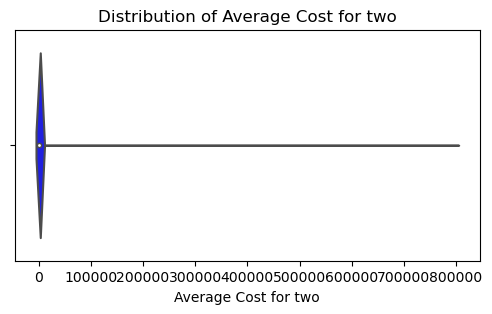

In [22]:
plt.figure(figsize=(6,3))
sns.violinplot(x='Average Cost for two', data=df, color='blue')
plt.title('Distribution of Average Cost for two')
plt.show()

# Average Cost for Two Insights

The 'Average Cost for Two' column in the dataset shows a diverse range of values, spanning from 0 to 800,000. Common average costs cluster around 200 to 900, with frequent occurrences at specific values like 500, 300, and 400.

Notably, there are outliers with exceptionally high costs (e.g., 70,000, 165,000, 450,000, 800,000). Only 2 instances have the highest average cost. The presence of a minimum value of 0 suggests potential data issues.

Thorough data cleaning and validation are crucial for accurate analysis.

In [23]:
# Univariate Analysis on our Second Target (Price Range)
count = df['Price range'].value_counts()
percentage = df['Price range'].value_counts(normalize=True) * 100

result= pd.DataFrame({'Count': count, 'Percentage': percentage})
result

Count  Percentage
1   4444   46.529159
2   3113   32.593446
3   1408   14.741912
4    586    6.135483

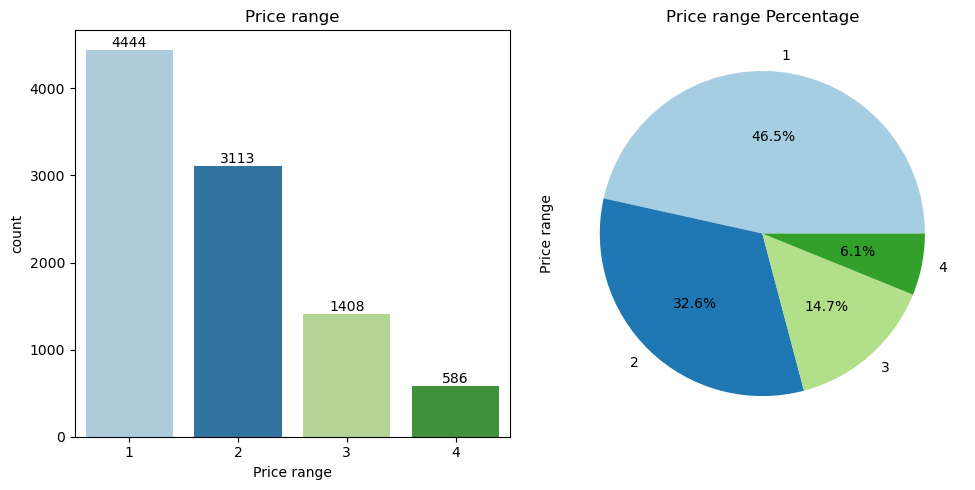

In [24]:
fig,axes =plt.subplots(1,2, figsize=(10,5))
sns.set_palette("Paired")

# First plot: Count Plot
ax = sns.countplot(x='Price range', data=df, ax=axes[0])
for container in ax.containers:
        ax.bar_label(container)
axes[0].set_title("Price range")

# Second Plot: Percentage count
df['Price range'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Price range Percentage")

plt.tight_layout()
plt.show()

# Price Range Distribution Insights

The 'Price range' distribution reveals a diverse pricing landscape:

- Nearly half of the restaurants (46.53%) fall into 'Price range 1', indicating affordable options.
- 'Price range 2' is the second most common (32.59%), representing moderately priced establishments.
- Higher price categories ('Price range 3' and 'Price range 4') have lower frequencies, suggesting a smaller proportion of upscale dining options (14.74% and 6.14%, respectively).

Overall, the dataset accommodates a mix of dining preferences, offering accessibility to various budget ranges.


In [25]:
# Univariate Analysis on Restaurant Name
restaurant_counts = df['Restaurant Name'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each restaurant
percentage_per_restaurant = (restaurant_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': restaurant_counts, 'Percentage': percentage_per_restaurant})
result_df.head(10)

Count  Percentage
Cafe Coffee Day      83    0.869019
Domino's Pizza       79    0.827139
Subway               63    0.659617
Green Chick Chop     51    0.533975
McDonald's           48    0.502565
Keventers            34    0.355984
Pizza Hut            30    0.314103
Giani                29    0.303633
Baskin Robbins       28    0.293163
Barbeque Nation      26    0.272223

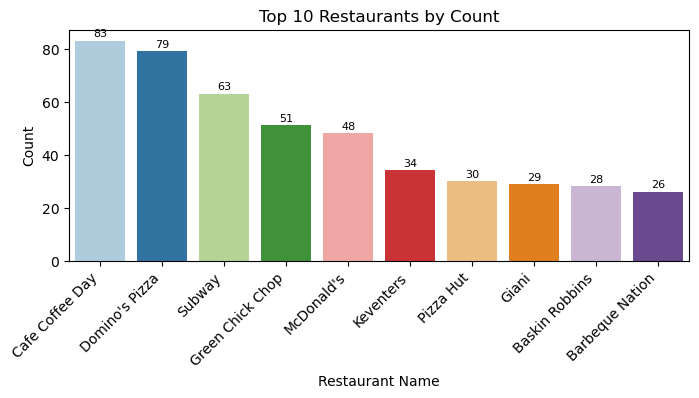

In [26]:
top_10_restaurants = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_10_restaurants.index, y='Count', data=top_10_restaurants, palette='Paired')
plt.title('Top 10 Restaurants by Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Top 10 Restaurants Summary

The top 10 restaurants, along with their counts and percentages, are summarized below:

1. Cafe Coffee Day: 83 occurrences (0.869%)
2. Domino's Pizza: 79 occurrences (0.827%)
3. Subway: 63 occurrences (0.660%)
4. Green Chick Chop: 51 occurrences (0.534%)
5. McDonald's: 48 occurrences (0.503%)
6. Keventers: 34 occurrences (0.356%)
7. Pizza Hut: 30 occurrences (0.314%)
8. Giani: 29 occurrences (0.303%)
9. Baskin Robbins: 28 occurrences (0.293%)
10. Barbeque Nation: 26 occurrences (0.272%)

These restaurants are the most frequently found in the dataset, with Cafe Coffee Day having the highest count and percentage.


In [27]:
# Univariate Analysis on City
city_counts = df['City'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each city
percentage_per_city = (city_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': city_counts, 'Percentage': percentage_per_city})
result_df.head(5)

Count  Percentage
New Delhi   5473   57.302900
Gurgaon     1118   11.705581
Noida       1080   11.307716
Faridabad    251    2.627997
Ghaziabad     25    0.261753

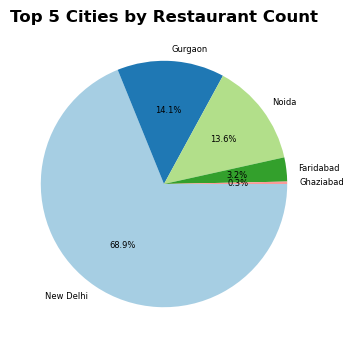

In [28]:
# Top 5 cities
top_5_cities = result_df.head(5)

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_5_cities['Count'], labels=top_5_cities.index, autopct='%1.1f%%', counterclock=False, textprops={'fontsize': 6})
plt.title('Top 5 Cities by Restaurant Count', fontweight='bold')
plt.show()

# Top Cities and Restaurant Distribution

The dataset encompasses a total of 141 distinct cities, each contributing to the overall distribution of restaurants. The top five cities and their corresponding restaurant counts and percentages are as follows:

1. New Delhi: 5473 restaurants (57.30%)
2. Gurgaon: 1118 restaurants (11.71%)
3. Noida: 1080 restaurants (11.31%)
4. Faridabad: 251 restaurants (2.63%)
5. Ghaziabad: 25 restaurants (0.26%)

This comprehensive breakdown provides a more detailed view of the restaurant distribution across various cities in the dataset.


In [29]:
# Univariate Analysis on Locality
locality_counts = df['Locality'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each Locality
percentage_per_city = (locality_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': locality_counts, 'Percentage': percentage_per_city})
result_df.head(10)

Count  Percentage
Connaught Place        122    1.277353
Rajouri Garden          99    1.036541
Shahdara                87    0.910899
Defence Colony          86    0.900429
Pitampura               85    0.889959
Malviya Nagar           85    0.889959
Mayur Vihar Phase 1     84    0.879489
Rajinder Nagar          81    0.848079
Safdarjung              80    0.837609
Satyaniketan            79    0.827139

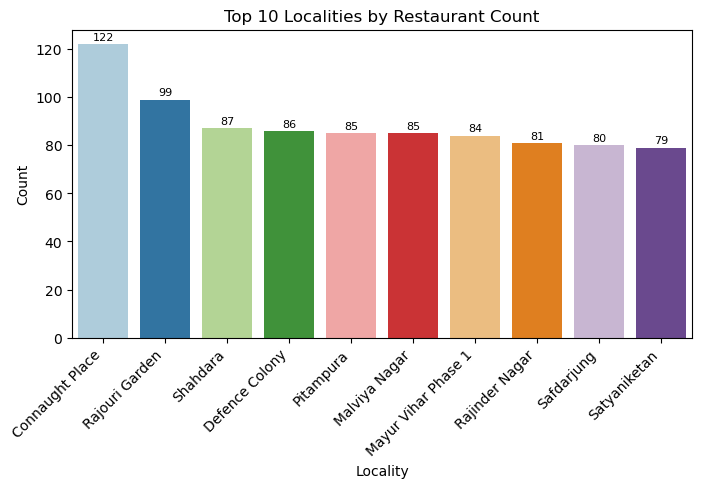

In [30]:
# Top 10 localities
top_10_localities = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_10_localities.index, y='Count', data=top_10_localities)
plt.title('Top 10 Localities by Restaurant Count')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Top 10 Localities Breakdown

The dataset contains a diverse range of localities, with a total of 1208 unique entries. Here is a more detailed breakdown of the top 10 localities:

1. Connaught Place: 122 restaurants (1.28%)
2. Rajouri Garden: 99 restaurants (1.04%)
3. Shahdara: 87 restaurants (0.91%)
4. Defence Colony: 86 restaurants (0.90%)
5. Pitampura: 85 restaurants (0.89%)
6. Malviya Nagar: 85 restaurants (0.89%)
7. Mayur Vihar Phase 1: 84 restaurants (0.88%)
8. Rajinder Nagar: 81 restaurants (0.85%)
9. Safdarjung: 80 restaurants (0.84%)
10. Satyaniketan: 79 restaurants (0.83%)

These percentages represent the proportion of each locality's restaurant count relative to the total number of entries in the dataset. Connaught Place has the highest number of restaurants among the top 10 localities.


In [31]:
# Univariate Analysis on Cuisines
df['Cuisines'].value_counts().sort_values(ascending=False)[:10]

North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

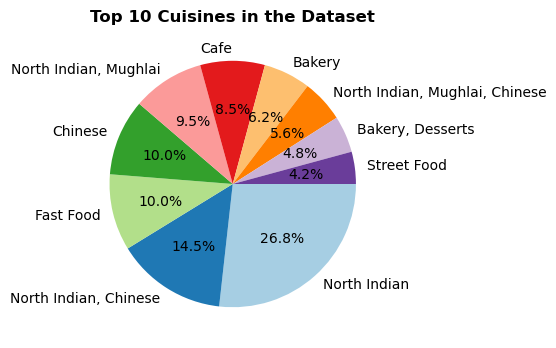

In [32]:
# Top 10 cuisines
top_10_cuisines = df['Cuisines'].value_counts().sort_values(ascending=False)[:10]

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_10_cuisines, labels=top_10_cuisines.index, autopct='%1.1f%%', counterclock=False)
plt.title('Top 10 Cuisines in the Dataset', fontweight='bold')
plt.show()

# Cuisine Diversity Overview

**Cuisine Diversity:**
The dataset captures a broad spectrum of 1825 distinct cuisines, highlighting the culinary richness and diversity across the restaurants.

**Top 3 Popular Cuisines:**
1. North Indian (945 occurrences): Topping the list, North Indian cuisine takes the lead as the most prevalent choice among restaurant offerings.
2. Chinese (511 occurrences): Following closely, Chinese cuisine secures the second spot, reflecting its widespread popularity.
3. Fast Food (354 occurrences): Not far behind, Fast Food claims the third position, showcasing a preference for quick and convenient dining options.

**Unique Offerings:**
Interestingly, numerous cuisines make a unique appearance in the dataset, emphasizing the variety and specialization that some restaurants bring to the table.

**Diverse Palates:**
From the aromatic North Indian dishes to the savory delights of Chinese cuisine and the quick bites of Fast Food, the dataset mirrors the diverse palates catered to by different restaurants.

This breakdown provides a snapshot of the culinary landscape within the dataset, shedding light on both popular and niche preferences among diners.


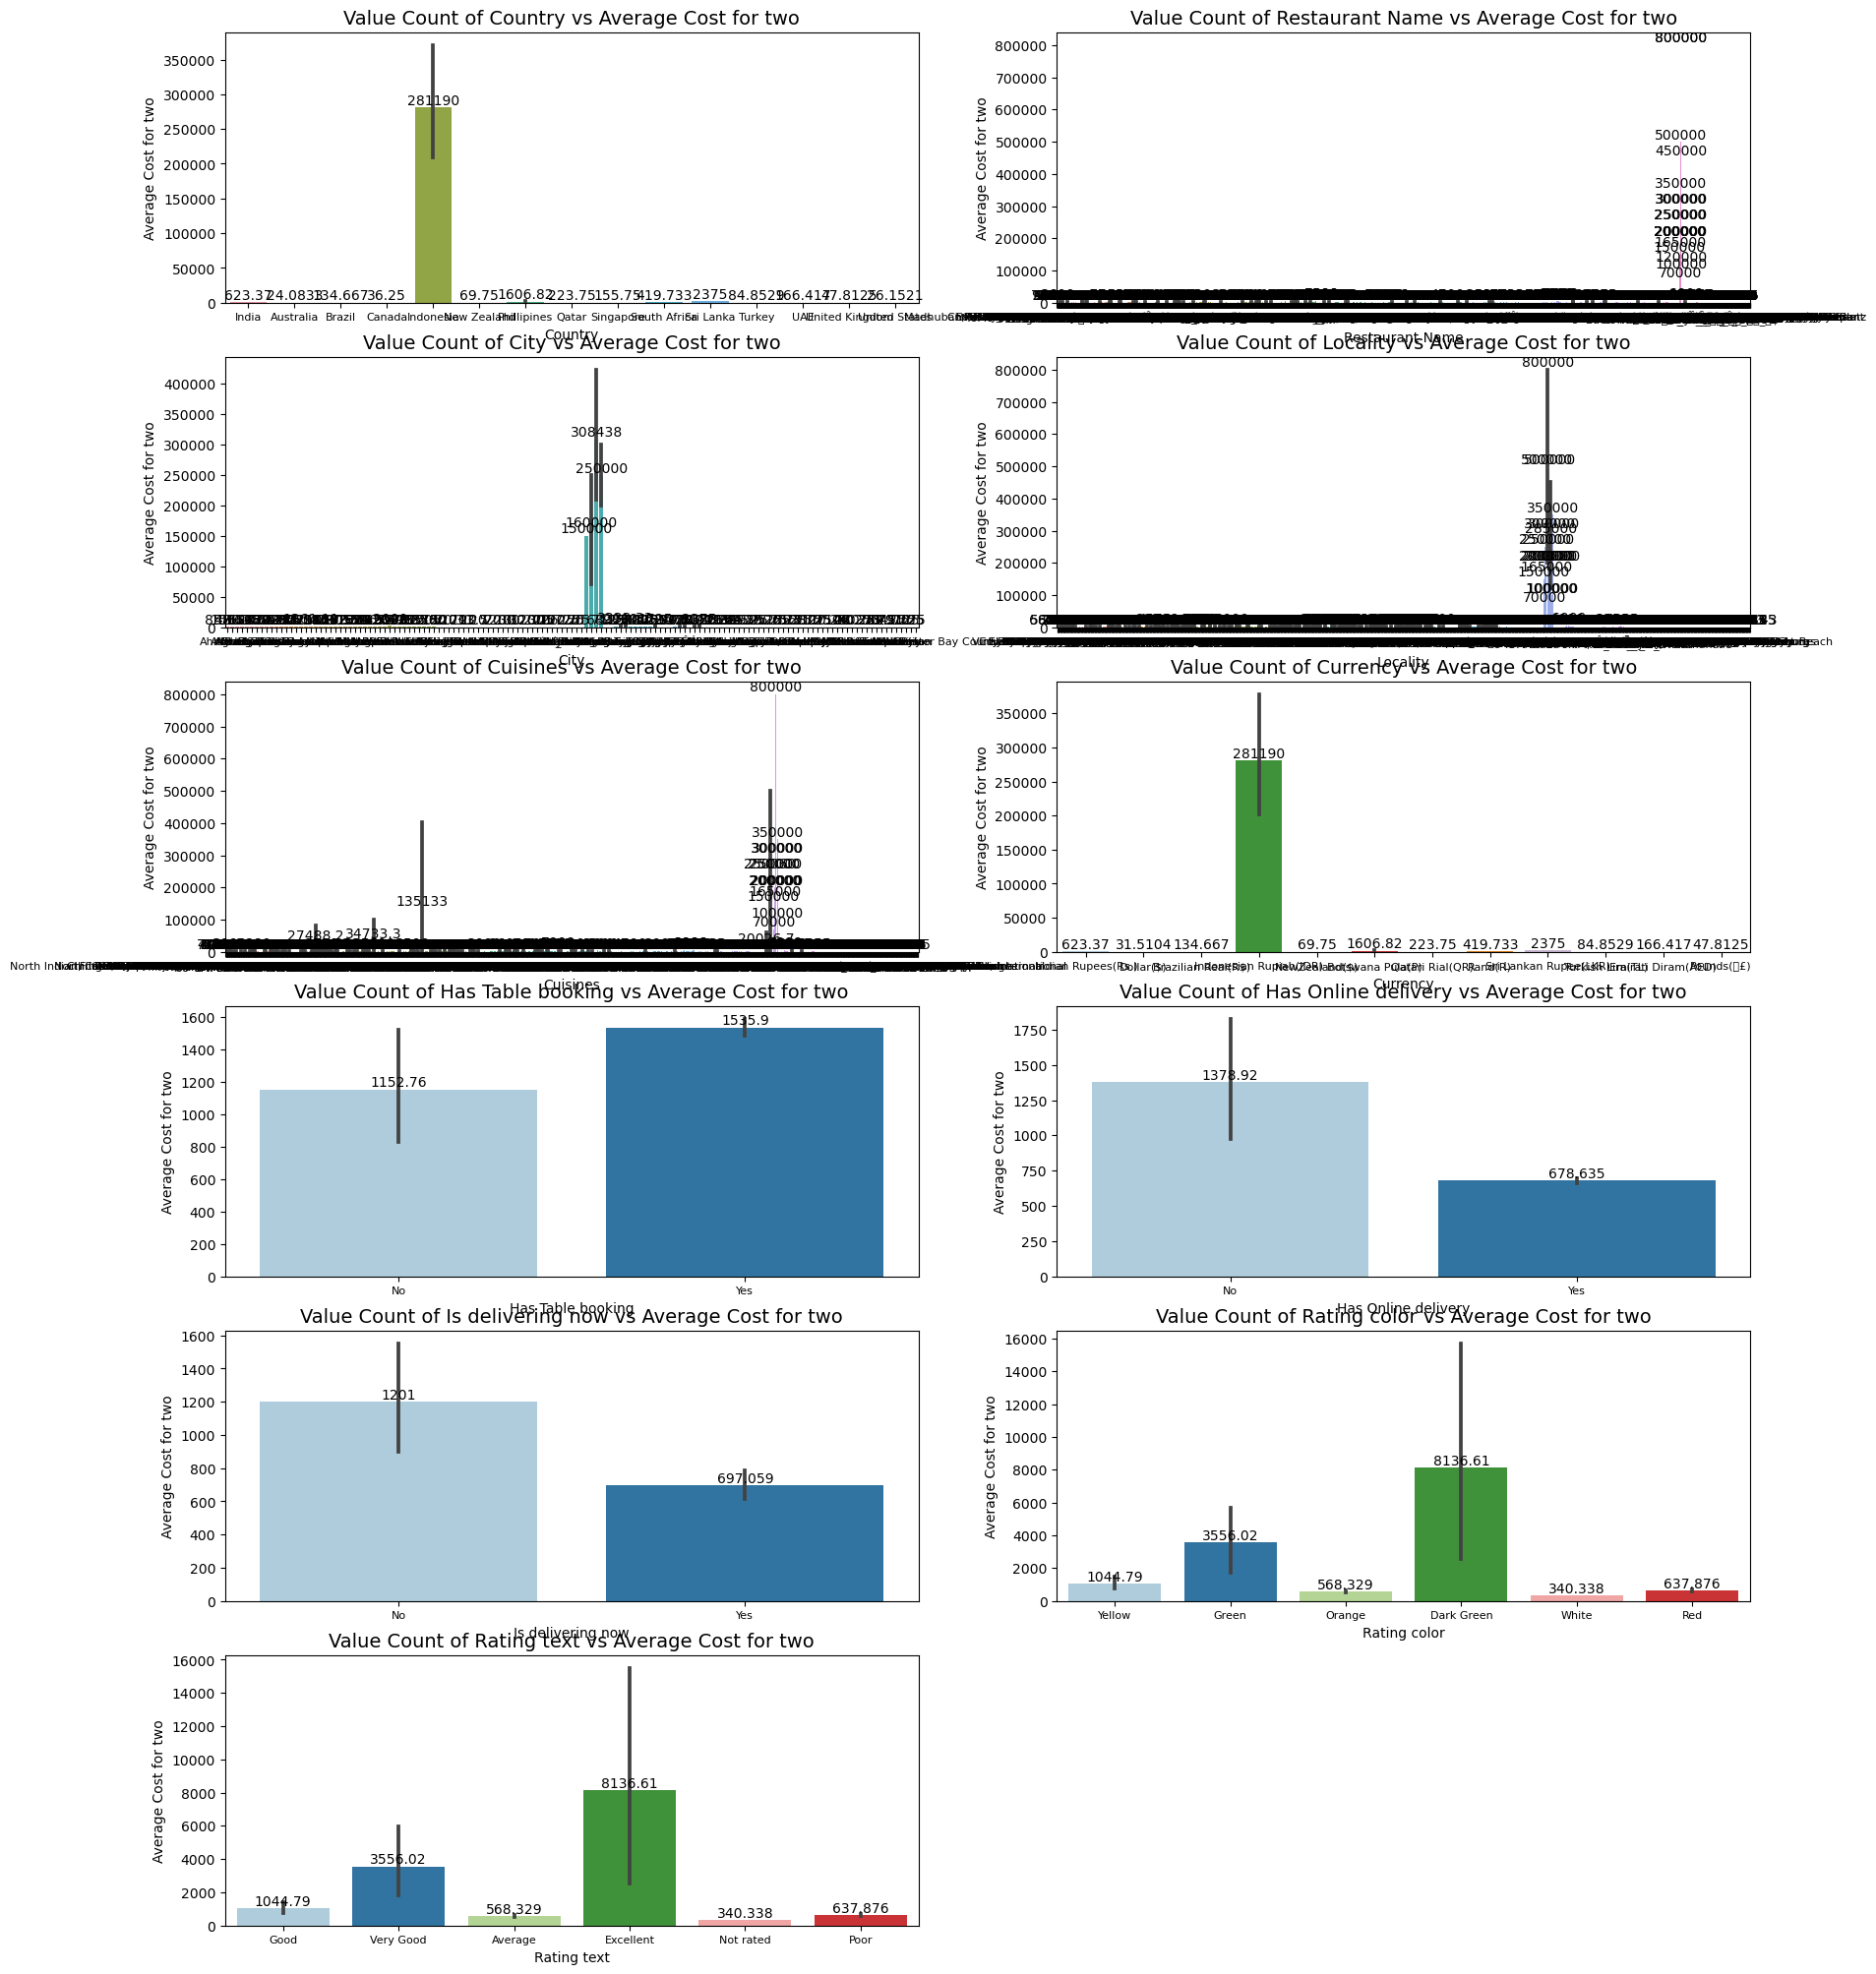

In [33]:
# Bivariate Analysis of Categorical Features with our First Target (Average Cost for two)
plt.figure(figsize=(20,25))
p=1

for i in categorical_columns:
    if p<=12:
        plt.subplot(6,2,p)
        ax= sns.barplot(x=i, y='Average Cost for two',data=df)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Average Cost for two', fontsize=14)
        plt.xticks(fontsize=8)
    p+=1
plt.show()

# Average Cost for Two Comparisons

**Across Country:**
- The average cost for two varies significantly across different countries.
- India has the highest average cost for two, followed by Indonesia, Sri Lanka, and UAE.
- Countries like Australia, Canada, and the United States have relatively lower average costs.

**Across Restaurant Name:**
- The average cost for two shows considerable variation among different restaurants.
- Some restaurants have a very high average cost, while others have a lower average cost.

**Across City:**
- The average cost for two varies across different cities, reflecting the local economic conditions.
- Some cities have a higher average cost, while others have a more affordable dining scene.

**Across Locality:**
- Locality-wise, there is a wide range in the average cost for two, indicating diverse dining options in different areas.
- Some localities have higher average costs, possibly due to premium dining establishments.

**Across Cuisines:**
- The type of cuisine also influences the average cost for two.
- Certain cuisines may be associated with higher or lower costs.

**Across Currency:**
- The currency in which the prices are listed affects the average cost for two.
- Countries with higher currency values tend to have higher average costs.

**Across Has Table Booking:**
- Restaurants that offer table booking tend to have a higher average cost for two compared to those that don't.

**Across Has Online Delivery:**
- Restaurants providing online delivery services have a varied average cost for two.

**Across Is Delivering Now:**
- Restaurants that are currently delivering have diverse average costs.

**Across Switch to Order Menu:**
- Most restaurants do not have a switch to order menu feature.

**Across Rating Color:**
- The color-coded ratings show a significant impact on the average cost for two.

**Across Rating Text:**
- The text-based ratings also correlate with the average cost for two.


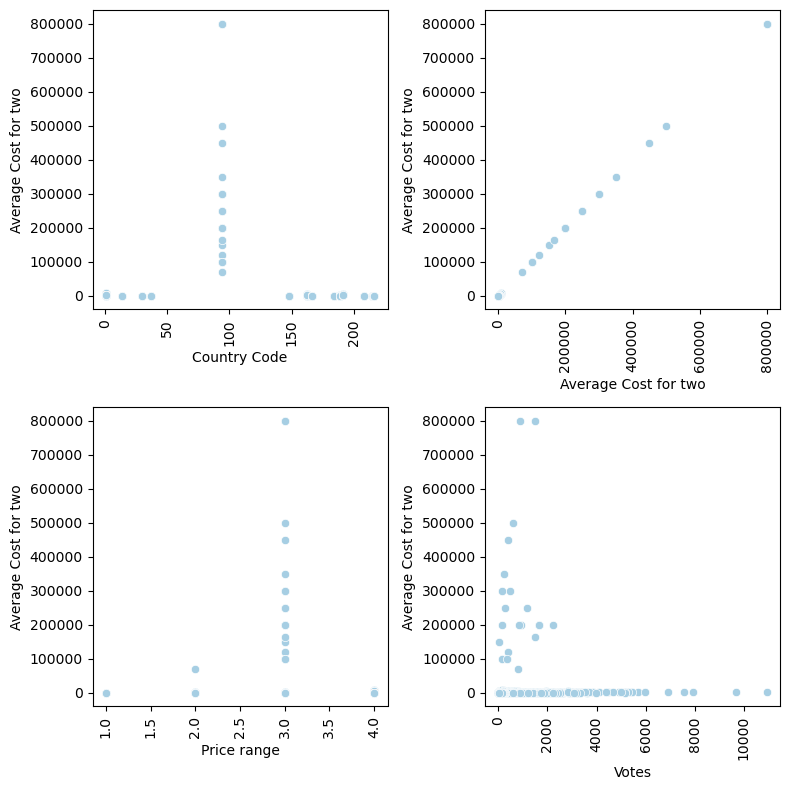

In [34]:
# Biveriate analysis of Numerical Features with our First Target (Average Cost for two)
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2

# Create the subplot grid
plt.figure(figsize=(8, 4 * num_rows))

# Plot each numerical column against 'Average Cost for two'
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df, x=col, y='Average Cost for two')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Average Cost for two')

plt.tight_layout()
plt.show()

# Average Cost for Two Comparisons

**Across Country Code:**
- The majority of the data is concentrated in Country Code 1 (India), where the average cost for two is significantly higher than in other countries.
- Other countries have relatively lower percentages of data, with varying average costs for two.

**Across Average Cost for Two:**
- The dataset includes a variety of average cost values for two, ranging from 0 to 800,000.
- The majority of the data falls into the lower cost range, with higher percentages in the lower values.

**Across Price Range:**
- The average cost for two varies across different price ranges.
- Price range 3 has the highest average cost, followed by price ranges 4, 2, and 1.

**Across Votes:**
- The dataset includes a diverse range of votes, with corresponding average costs for two.
- The majority of votes have lower average costs, while some votes have significantly higher average costs.


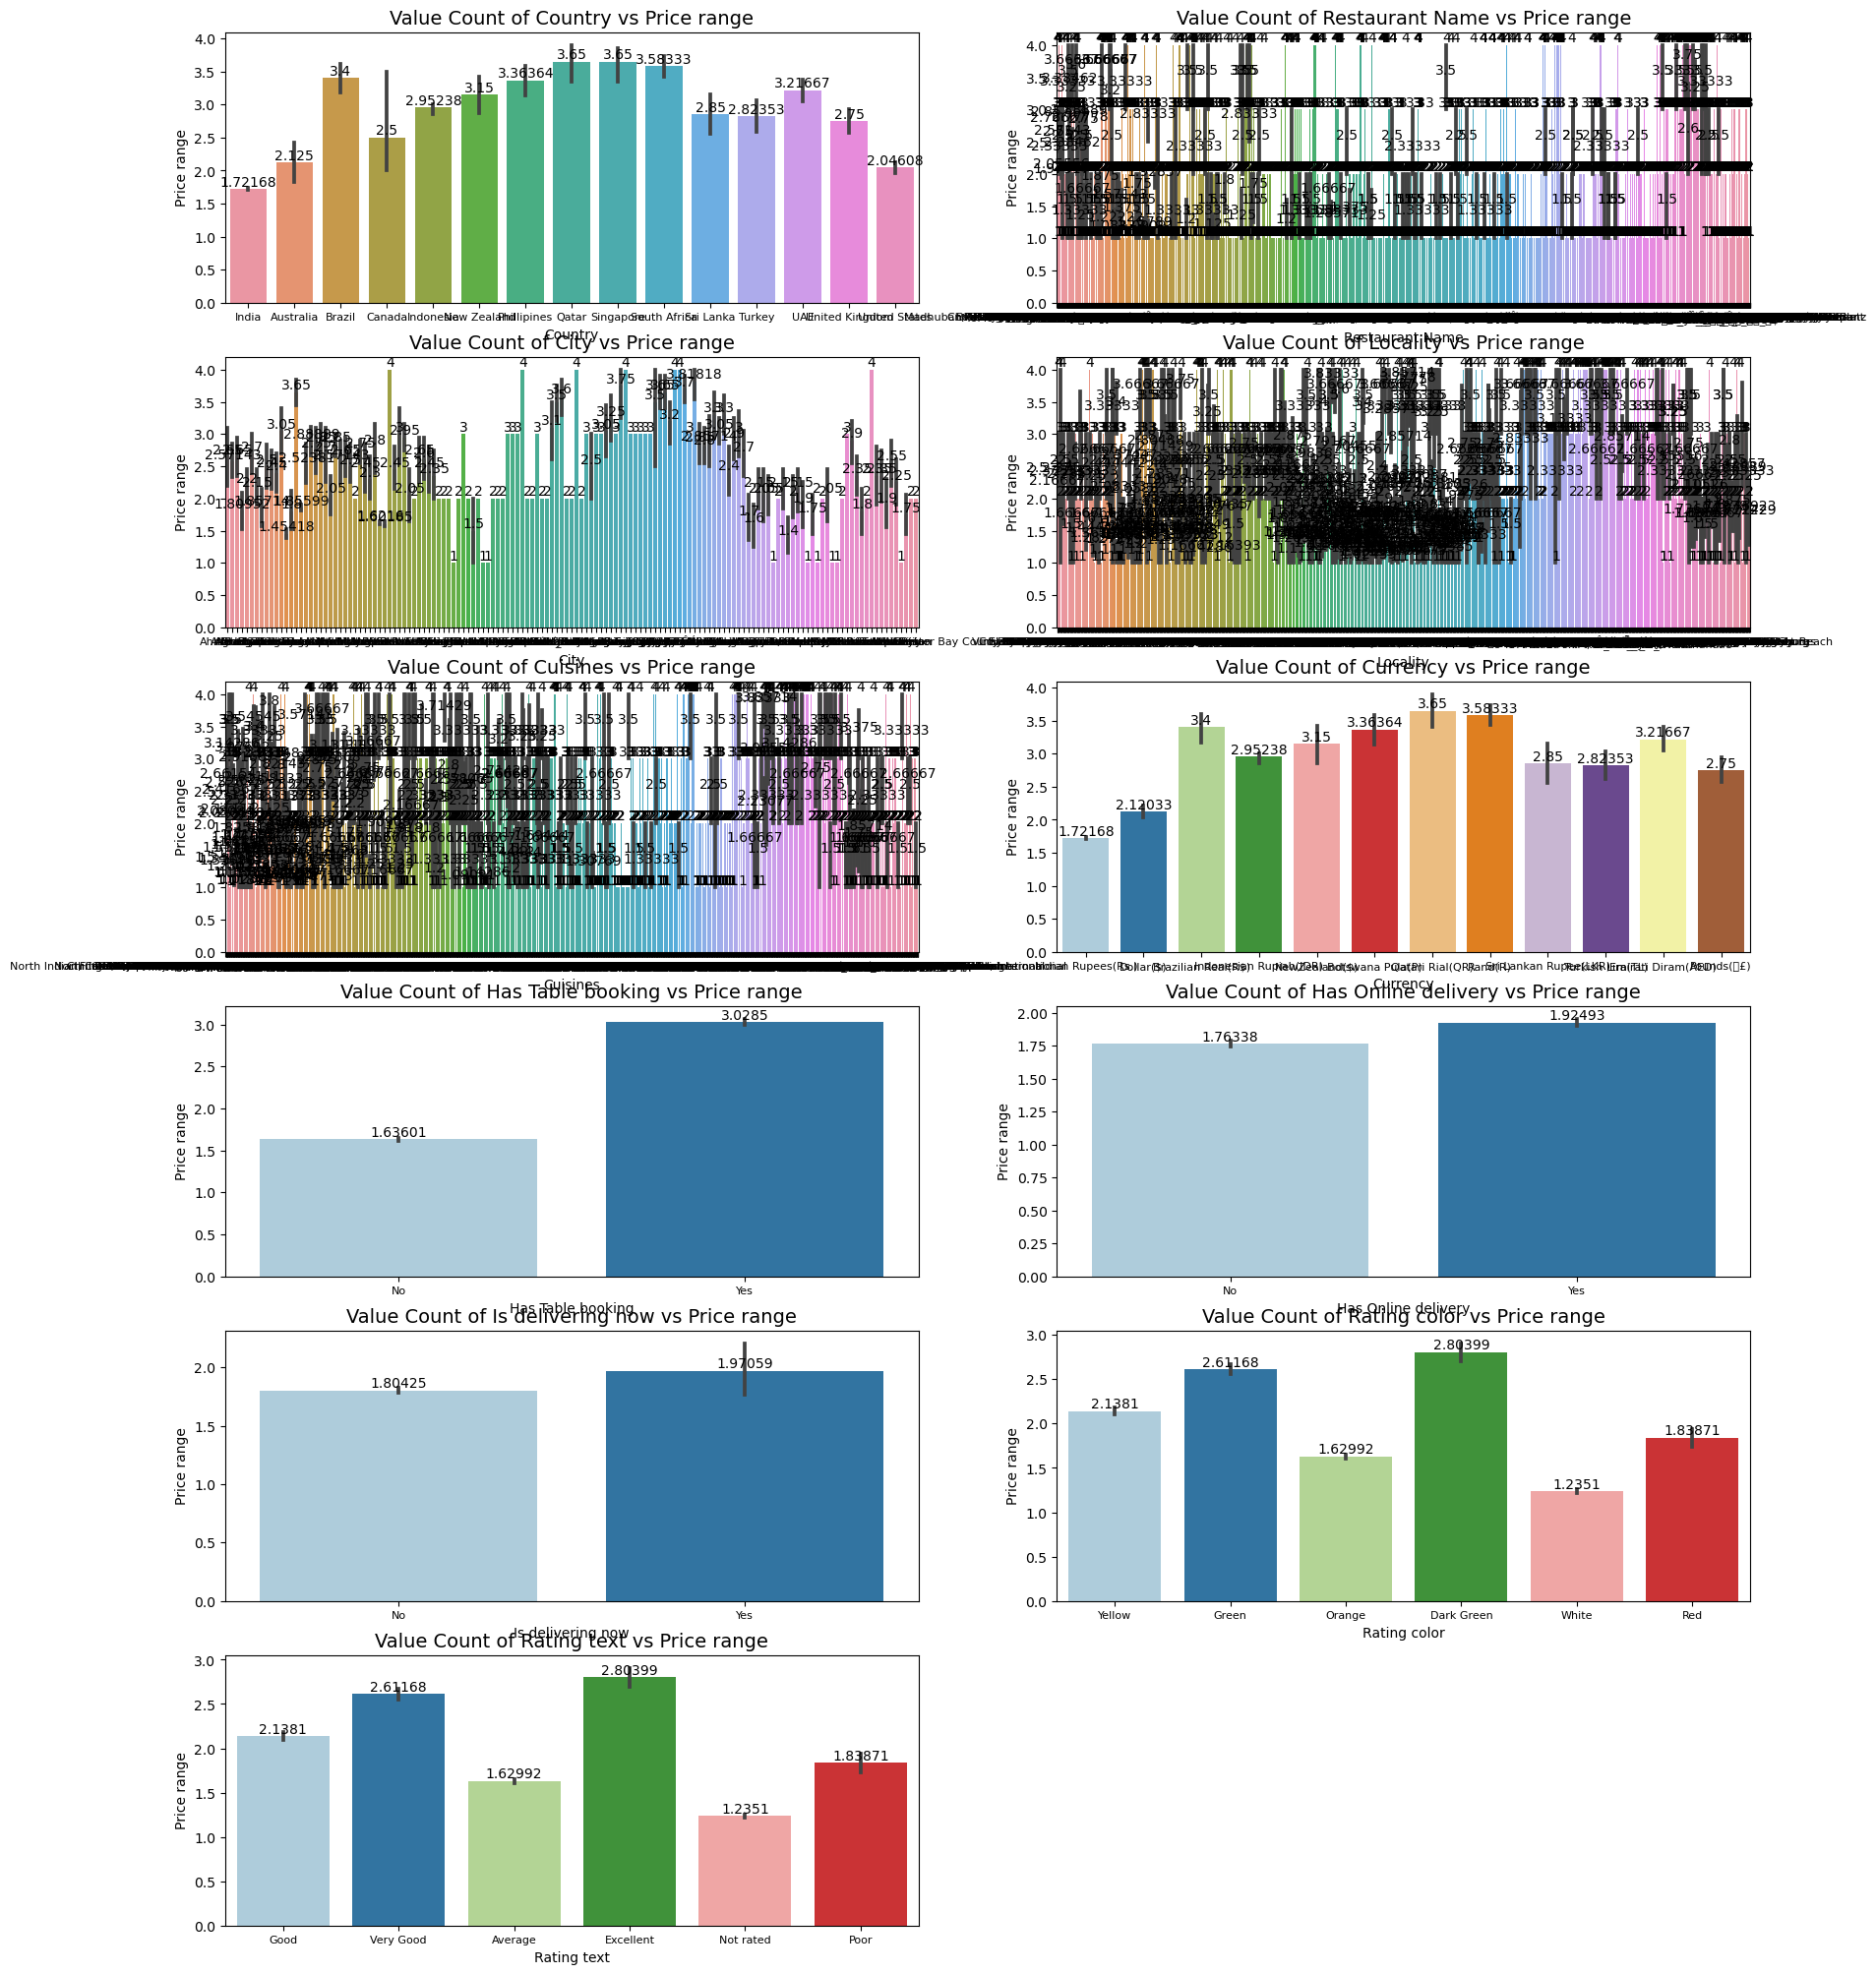

In [35]:
# Biveriate analysis of Categorical Features with our Second Target (Price range)
plt.figure(figsize=(20,25))
p=1

for i in categorical_columns:
    if p<=12:
        plt.subplot(6,2,p)
        ax= sns.barplot(x=i, y='Price range',data=df)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Price range', fontsize=14)
        plt.xticks(fontsize=8)
    p+=1
plt.show()

# Price Range Comparisons

**Across Country:**
- The majority of restaurants in India (Country Code 1) have a price range of 1, indicating that they are generally more affordable.
- Other countries have varying percentages across different price ranges.

**Across Restaurant Name:**
- Restaurants have different price ranges, and the percentages are spread across various values.
- Some restaurants have lower price ranges, while others have higher ones.

**Across City:**
- Cities exhibit a range of price ranges, with some having higher percentages in certain ranges.
- Price range 1 is dominant in many cities.

**Across Locality:**
- Localities show a diverse distribution of price ranges.
- Some localities have higher percentages in certain price ranges.

**Across Cuisines:**
- Cuisines have varying price ranges, and the percentages are distributed across different values.
- Different cuisines cater to different price ranges.

**Across Currency:**
- Currencies have different dominant price ranges.
- Indian Rupees (Rs.) have a higher percentage in price range 1.

**Across Has Table Booking:**
- Restaurants without table booking (No) tend to have lower price ranges (1), while those with table booking (Yes) have a broader distribution.

**Across Has Online Delivery:**
- The majority of restaurants offering online delivery (Yes) have lower price ranges (1), while those without (No) have a broader distribution.

**Across Is Delivering Now:**
- Restaurants not delivering now (No) have a broader distribution of price ranges, while those delivering now (Yes) are concentrated in lower price ranges (1).

**Across Switch to Order Menu:**
- Restaurants with the option to switch to the order menu (No) have a broader distribution of price ranges.

**Across Rating Color:**
- Different rating colors show varying distributions of price ranges.

**Across Rating Text:**
- Rating texts are associated with different price ranges, with varying percentages across the values.

These comparisons offer insights into how the price range of restaurants varies across different categorical variables in the dataset.


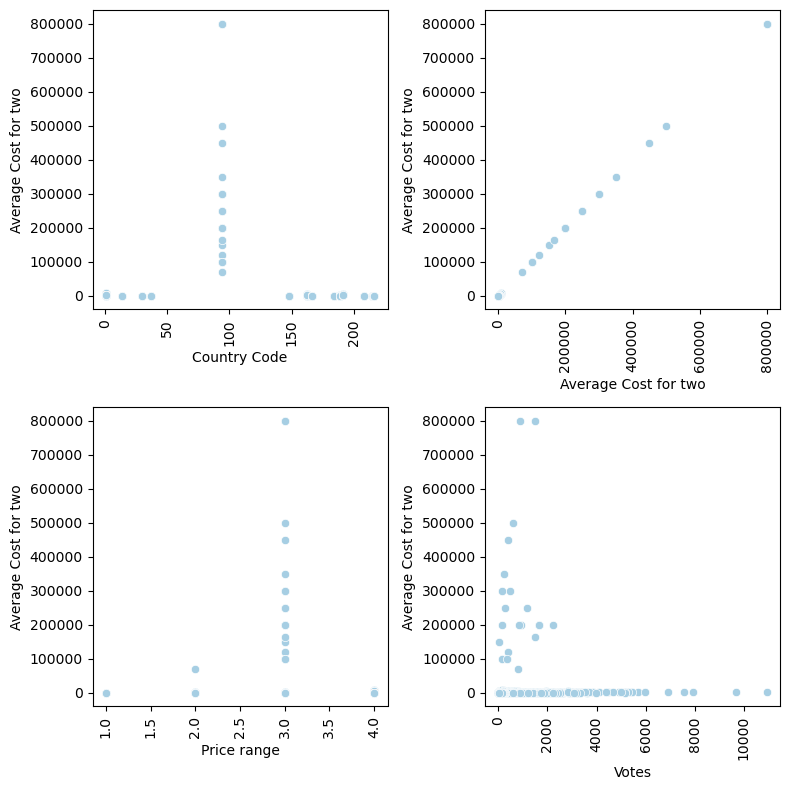

In [36]:
# Numerical Features with our second Target (Price range)
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2

# Create the subplot grid
plt.figure(figsize=(8, 4 * num_rows))

# Plot each numerical column against 'Average Cost for two'
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df, x=col, y='Average Cost for two')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Average Cost for two')

plt.tight_layout()
plt.show()

# Price Range Observations

**Comparison of Price Range across Country Code:**
- The highest percentage of price range 1 is found in Country Code 1 (India), indicating that most restaurants in India are generally more affordable.
- Other countries have varying percentages across different price ranges, with some having a dominant range.

**Comparison of Price Range across Average Cost for Two:**
- Price ranges are distributed across different average cost values.
- The majority of restaurants with an average cost of 0 have a price range of 1.

**Comparison of Price Range across Price Range:**
- The dataset's price ranges are predominantly 1, 2, 3, and 4, with varying percentages.
- Price range 1 has the highest percentage.

**Comparison of Price Range across Votes:**
- Votes are associated with different price ranges, with varying percentages across the values.
- Higher vote counts are generally associated with lower price ranges.

These comparisons provide insights into the distribution of price ranges across different variables, including country code, average cost, price range, and votes. It helps understand how price ranges correlate with other features in the dataset.


In [37]:
# Ratings
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
rating

Aggregate rating Rating color Rating text  Rating count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

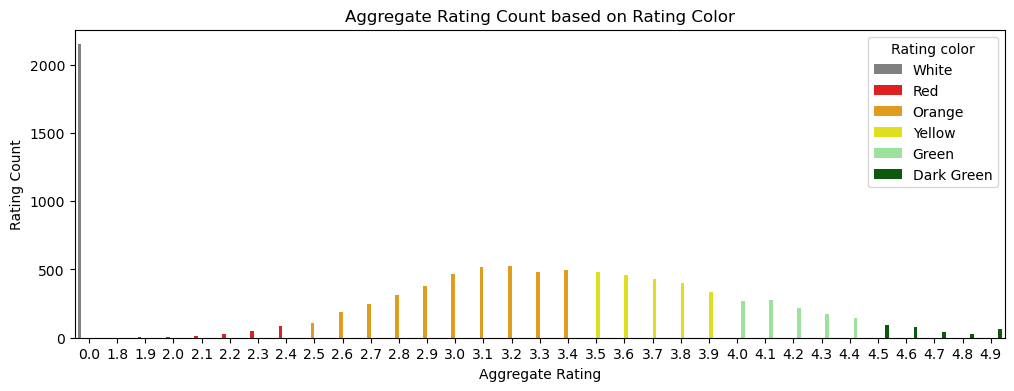

In [38]:
# Mapping rating color to a custom color palette
color_palette = {
    "Red": "red",
    "Orange": "orange",
    "Yellow": "yellow",
    "Green": "lightgreen",
    "Dark Green": "darkgreen",
    "White": "grey"
}

# Visualizing Aggregate Rating Count based on Rating Color with custom colors
plt.figure(figsize=(12, 4))
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', palette=color_palette, data=rating)
plt.title('Aggregate Rating Count based on Rating Color')
plt.xlabel('Aggregate Rating')
plt.ylabel('Rating Count')
plt.show()

# Aggregate Rating Observations

## Aggregate Rating Distribution:

- The aggregate ratings range from 0.0 to 4.9, with varying counts at each level.
- The majority of ratings fall in the range of 2.5 to 4.5.

## Rating Color and Text:

- Ratings are categorized into different colors and text labels based on the aggregate rating.
- Ratings below 2.5 are labeled as "Poor" and are associated with the color red.
- Ratings between 2.5 and 3.4 are labeled as "Average" and are associated with the color orange.
- Ratings between 3.5 and 4.4 are labeled as "Good" and are associated with the color yellow.
- Ratings of 4.5 and above are labeled as "Very Good" or "Excellent" and are associated with the colors green and dark green.

## Count of Ratings:

- The count of ratings varies for each aggregate rating level.
- The highest count is observed for aggregate ratings between 3.0 and 3.9, indicating that restaurants in this range are more commonly rated.

Overall, the data provides insights into the distribution of aggregate ratings, their associated colors and text labels, and the corresponding count of ratings. It appears that the majority of restaurants have ratings indicating average to very good quality.


In [39]:
# Restaurant name comparing with our First Target (Average Cost for two)
# Calculate average cost for two for each restaurant
avg_price_restaurants = df.groupby('Restaurant Name')['Average Cost for two'].mean()

# Sort by average cost for two in ascending order
ascending_order = avg_price_restaurants.sort_values().head(10)

# Sort by average cost for two in descending order
descending_order = avg_price_restaurants.sort_values(ascending=False).head(10)

# Create DataFrames for both orders
ascending_df = pd.DataFrame({'Restaurant Name': ascending_order.index, 'Average Cost for Two (Ascending)': ascending_order.values})
descending_df = pd.DataFrame({'Restaurant Name': descending_order.index, 'Average Cost for Two (Descending)': descending_order.values})

# Concatenate DataFrames side by side
side_by_side_df = pd.concat([ascending_df, descending_df], axis=1)
side_by_side_df

Restaurant Name  Average Cost for Two (Ascending)  \
0                         Azteca                               0.0   
1                  Senor Iguanas                               0.0   
2           BMG - All Day Dining                               0.0   
3                 The BrewMaster                               0.0   
4                VNS Live Studio                               0.0   
5           HI Lite Bar & Lounge                               0.0   
6                    Royal Hotel                               0.0   
7                  Cookie Shoppe                               0.0   
8  Happy Joe's Pizza & Ice Cream                               0.0   
9                Sheroes Hangout                               0.0   

               Restaurant Name  Average Cost for Two (Descending)  
0                         Skye                           800000.0  
1     Satoo - Hotel Shangri-La                           800000.0  
2                   Sushi Masa                           500000.0  
3               3 Wise Monkeys                           450000.0  
4  Avec Moi Restaurant and Bar                           350000.0  
5                      Onokabe                           300000.0  
6   Lucky Cat Coffee & Kitchen                           300000.0  
7                        MONKS                           250000.0  
8                   Lemongrass                           250000.0  
9             Talaga Sampireun                           200000.0

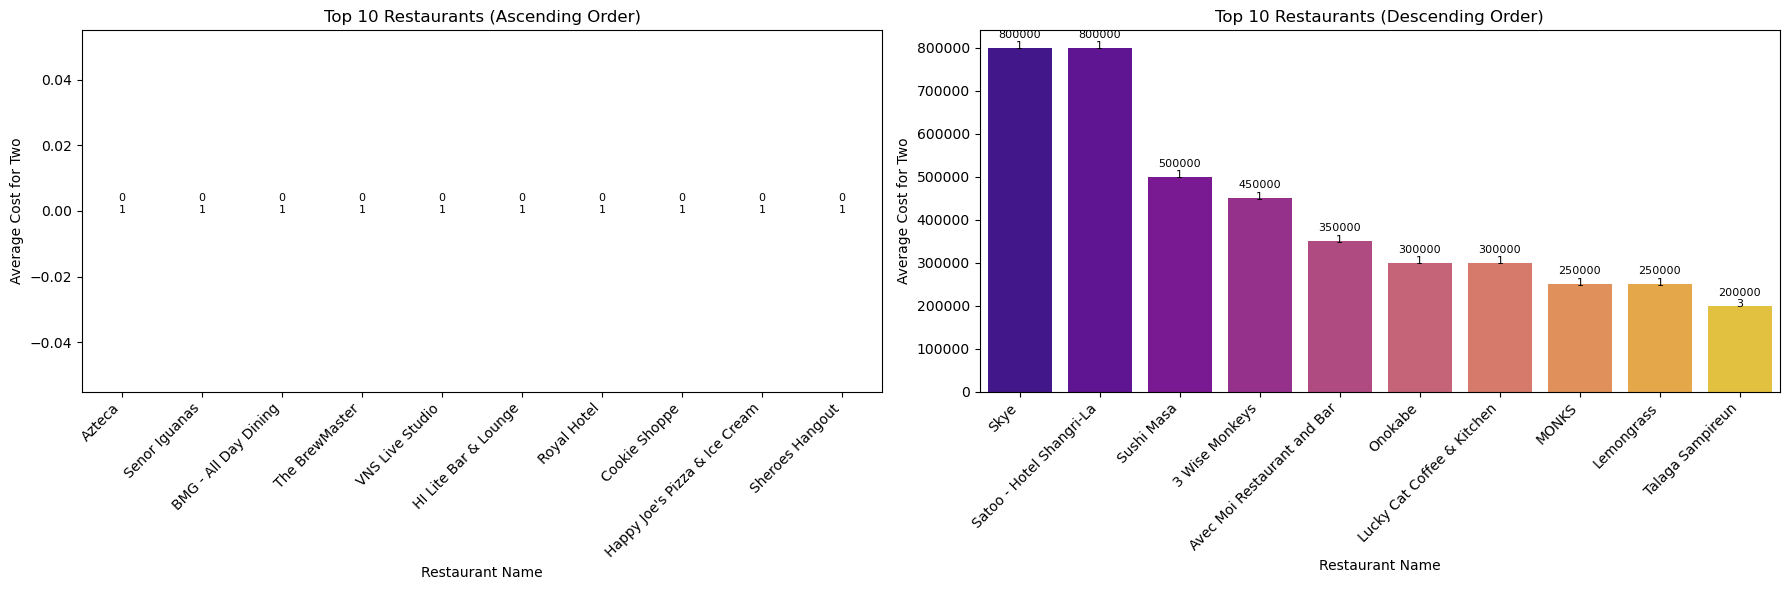

In [40]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot for ascending order
ascending_plot = sns.barplot(ax=axes[0], x=ascending_order.index, y=ascending_order.values, palette='viridis')
axes[0].set_title('Top 10 Restaurants (Ascending Order)')
axes[0].set_xlabel('Restaurant Name')
axes[0].set_ylabel('Average Cost for Two')
axes[0].set_xticklabels(ascending_order.index, rotation=45, ha='right')

# Add count values on bars
for i, p in enumerate(ascending_plot.patches):
    count = restaurant_counts[ascending_order.index[i]]
    axes[0].annotate(f'{p.get_height():.0f}\n{count:.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plot for descending order
descending_plot = sns.barplot(ax=axes[1], x=descending_order.index, y=descending_order.values, palette='plasma')
axes[1].set_title('Top 10 Restaurants (Descending Order)')
axes[1].set_xlabel('Restaurant Name')
axes[1].set_ylabel('Average Cost for Two')
axes[1].set_xticklabels(descending_order.index, rotation=45, ha='right')

# Add count values on bars
for i, p in enumerate(descending_plot.patches):
    count = restaurant_counts[descending_order.index[i]]
    axes[1].annotate(f'{p.get_height():.0f}\n{count:.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

In [41]:
# Reastaurant name Comparing with our Second Target (Price range)
# Calculate Price range for each restaurant
price_restaurants = df.groupby('Restaurant Name')['Price range'].mean()

# Sort by average cost for two in ascending order
ascending_order = price_restaurants.sort_values().head(10)

# Sort by average cost for two in descending order
descending_order = price_restaurants.sort_values(ascending=False).head(10)

# Create DataFrames for both orders
ascending_df1 = pd.DataFrame({'Restaurant Name': ascending_order.index, 'Price range (Ascending)': ascending_order.values})
descending_df1 = pd.DataFrame({'Restaurant Name': descending_order.index, 'Price range (Descending)': descending_order.values})

# Concatenate DataFrames side by side
side_by_side_df1 = pd.concat([ascending_df1, descending_df1], axis=1)
side_by_side_df1

Restaurant Name  Price range (Ascending)  \
0                Let's Burrrp                      1.0   
1                 Maggi Point                      1.0   
2    Madurai Meenakshi Bhawan                      1.0   
3         Madras Coffee House                      1.0   
4              Madly Bangalee                      1.0   
5  Madhuvan Chinese Fast Food                      1.0   
6          Maddi Sweet Centre                      1.0   
7          Magic Mo:Mo Corner                      1.0   
8       Madan Sweets & Bakers                      1.0   
9     Madan Cafe & Restaurant                      1.0   

                       Restaurant Name  Price range (Descending)  
0                                Huqqa                       4.0  
1  House of Ming - The Taj Mahal Hotel                       4.0  
2                                 I Am                       4.0  
3                                 Hype                       4.0  
4                                Baris                       4.0  
5                    Spaghetti Kitchen                       4.0  
6             The Smokehouse and Grill                       4.0  
7           Spice - The Indian Kitchen                       4.0  
8                        Basil & Thyme                       4.0  
9           Spice Court - Hotel Maurya                       4.0

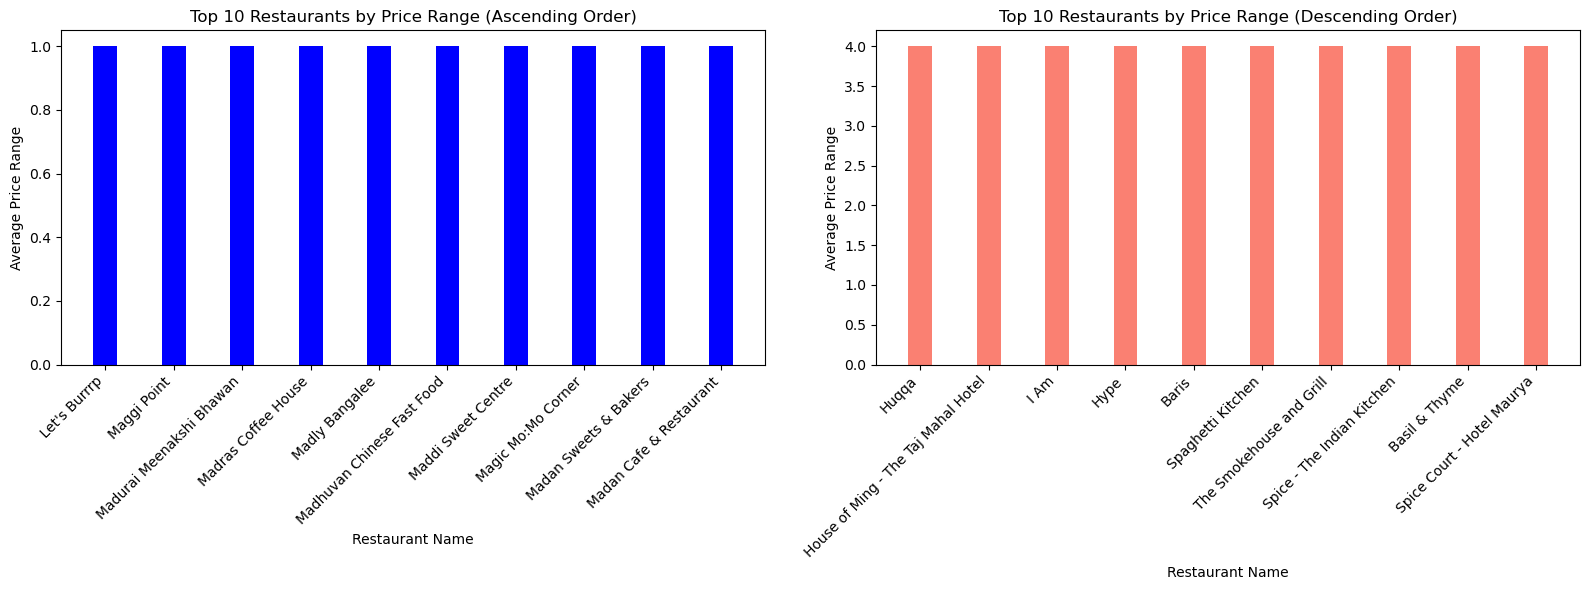

In [42]:
# Set up positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(ascending_df1))

# Create two figures and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for ascending order
ax1.bar(bar_positions, ascending_df1['Price range (Ascending)'], bar_width, label='Ascending Order', color='blue')
ax1.set(xticks=bar_positions, xticklabels=ascending_df1['Restaurant Name'], xlabel='Restaurant Name', ylabel='Average Price Range',
        title='Top 10 Restaurants by Price Range (Ascending Order)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Bar plot for descending order
ax2.bar(bar_positions, descending_df1['Price range (Descending)'], bar_width, label='Descending Order', color='salmon')
ax2.set(xticks=bar_positions, xticklabels=descending_df1['Restaurant Name'], xlabel='Restaurant Name', ylabel='Average Price Range',
        title='Top 10 Restaurants by Price Range (Descending Order)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

# Price Range Analysis

## Ascending Order:

The restaurants in the ascending order of average price range (from low to high) are:
1. Let's Burrrp
2. Maggi Point
3. Madurai Meenakshi Bhawan
4. Madras Coffee House
5. Madly Bangalee
6. Madhuvan Chinese Fast Food
7. Maddi Sweet Centre
8. Magic Mo:Mo Corner
9. Madan Sweets & Bakers
10. Madan Cafe & Restaurant

The price range for all these restaurants is 1.0.

## Descending Order:

The restaurants in the descending order of average price range (from high to low) are:
1. Huqqa
2. House of Ming - The Taj Mahal Hotel
3. I Am
4. Hype
5. Baris
6. Spaghetti Kitchen
7. The Smokehouse and Grill
8. Spice - The Indian Kitchen
9. Basil & Thyme
10. Spice Court - Hotel Maurya

The price range for all these restaurants is 4.0.

## Observations:

- The price range is consistent within each ordering (ascending and descending), indicating that the ranking is solely based on the average price range for two people.
- There is a notable difference in the price range between the restaurants in the ascending and descending orders, with ascending order restaurants having a lower average price range compared to the descending order restaurants.
- It's important to note that the provided dataset and analysis are based on the average price range, and individual preferences may vary when choosing a restaurant based on pricing.

In [44]:
# Restaurant name by Aggregate rating
df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10)

Restaurant Name
Atlanta Highway Seafood Market    4.9
Bao                               4.9
Braseiro da Gíçvea                4.9
CakeBee                           4.9
Carnival By Tresind               4.9
Caterspoint                       4.9
Cube - Tasting Kitchen            4.9
Draft Gastro Pub                  4.9
Duck & Waffle                     4.9
Flat Iron                         4.9
Name: Aggregate rating, dtype: float64

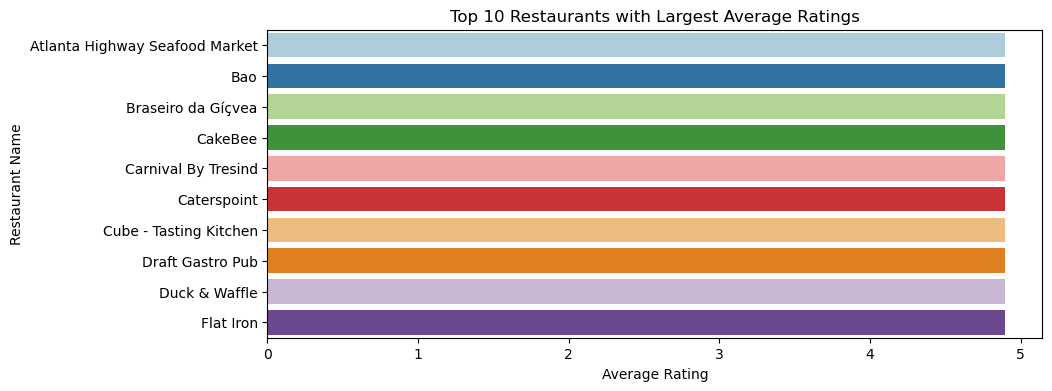

In [45]:
top_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar plot for top 10 restaurants with largest average ratings
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='Paired', ax=ax)

# Set the labels and title
ax.set(xlabel='Average Rating', ylabel='Restaurant Name', title='Top 10 Restaurants with Largest Average Ratings')

# Show the plot
plt.show()

# Top-Rated Restaurants

The list comprises restaurants with exceptionally high average ratings, all scoring a perfect 4.9.

## Consistency in Ratings:

Each restaurant in the list, including:
1. Atlanta Highway Seafood Market
2. Bao
3. Braseiro da Gíçvea
4. CakeBee
5. Carnival By Tresind
6. Caterspoint
7. Cube - Tasting Kitchen
8. Draft Gastro Pub
9. Duck & Waffle
10. Flat Iron

has consistently received the same high rating of 4.9.

## High Quality or Popularity:

The uniformity in ratings suggests a high level of customer satisfaction, indicating that these restaurants are likely known for their quality of service, food, or overall dining experience.

## Potential Favorites:

These restaurants could be potential favorites among customers, and the perfect rating may attract more patrons looking for exceptional dining experiences.

## Additional Information:

While the provided data highlights the top-rated restaurants based on average ratings, it's essential to consider other factors such as the number of ratings, reviews, and individual preferences to form a comprehensive understanding of a restaurant's popularity and quality.

In summary, the listed restaurants stand out for their perfect average ratings, reflecting a consistent and exceptional level of customer satisfaction.


In [46]:
# Restaurant name by Voting
df.groupby('Restaurant Name')['Votes'].mean().nlargest(10)

Restaurant Name
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
BarBQ                5288.0
Warehouse Cafe       4914.0
Truffles             4841.0
Mocambo              4464.0
Gulati               4373.0
Name: Votes, dtype: float64

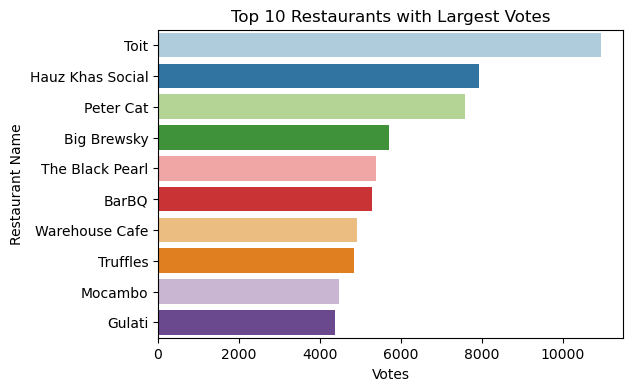

In [47]:
top_votes = df.groupby('Restaurant Name')['Votes'].agg(['mean', 'count']).nlargest(10, 'mean')

fig, ax = plt.subplots(figsize=(6,4))

# Bar plot for top 10 restaurants with largest Votes
bars = sns.barplot(x=top_votes['mean'], y=top_votes.index, palette='Paired', ax=ax)
ax.set(xlabel='Votes', ylabel='Restaurant Name', title='Top 10 Restaurants with Largest Votes')

# Show the plot
plt.show()

# Top-Rated Restaurants by Vote Counts

This list showcases restaurants with high average vote counts, providing insights into their popularity among diners.

- **Toit** stands out with the highest average vote count, an impressive 10,934 votes.

## Consistent Popularity:

The top-rated restaurants, including Hauz Khas Social, Peter Cat, Big Brewsky, The Black Pearl, BarBQ, Warehouse Cafe, Truffles, Mocambo, and Gulati, consistently maintain substantial vote counts.

## Dining Hotspots:

These establishments emerge as popular dining hotspots, evident from the significant number of votes they attract.

## Culinary Diversity:

The list encompasses a diverse range of cuisines, indicating that popularity is influenced by factors beyond cuisine type, such as food quality, ambiance, and service.

## Quality Indicators:

Higher vote counts often serve as indicators of quality, suggesting that these restaurants enjoy a positive reputation and attract a large customer base.

## Individual Preferences:

While vote counts offer a general measure of popularity, individual preferences may vary based on personal taste, location, and atmosphere.

In summary, these top-rated restaurants not only boast high ratings but also command substantial vote counts, affirming their popularity and status as favored dining destinations.

In [48]:
# Comparing our both target
df.groupby('Price range')['Average Cost for two'].mean()

Price range
1     275.182943
2     596.826213
3    5177.268466
4    1848.523891
Name: Average Cost for two, dtype: float64

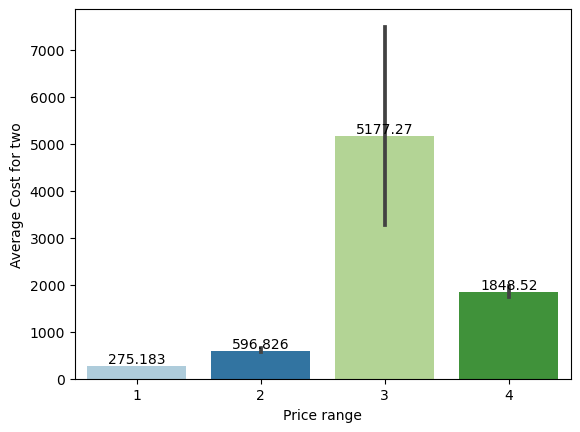

In [49]:
ax=sns.barplot(x='Price range',y='Average Cost for two',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Exploring the Relationship Between Price Range and Average Cost

## Key Findings:

- **Positive Correlation:** The data reveals a positive correlation between the price range and the average cost for two people. As the price range increases, the average cost for dining also tends to rise.

- **Budget-Friendly Options:** Price Range 1 and Price Range 2 are associated with more budget-friendly dining options. These categories are likely to appeal to those seeking economical choices.

- **Upscale Dining:** Price Range 3 and Price Range 4 indicate a shift towards more upscale dining experiences. Restaurants in these categories are likely to target a clientele willing to spend more on their dining experience.

- **Diverse Dining Landscape:** The dataset reflects a diverse range of dining options, accommodating various budget preferences within the defined price ranges.

## Considerations:

- **Beyond Average Cost:** While average cost is a valuable metric, it's important to consider other factors such as individual preferences, menu offerings, and the overall dining experience when selecting a restaurant.

These observations provide valuable insights into how different price ranges offer a spectrum of dining options, catering to diverse preferences and budgets.


In [50]:
# Comparing Rating text vs Average Cost for two
df.groupby('Rating text')['Average Cost for two'].mean()

Rating text
Average       568.328873
Excellent    8136.611296
Good         1044.791429
Not rated     340.337523
Poor          637.876344
Very Good    3556.019462
Name: Average Cost for two, dtype: float64

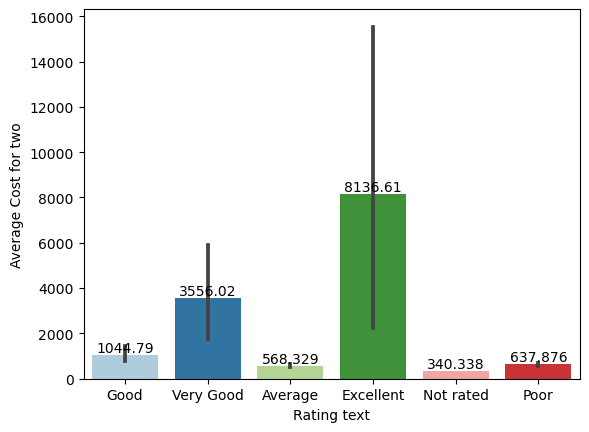

In [51]:
ax=sns.barplot(x='Rating text',y='Average Cost for two',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Exploring the Relationship Between Rating Text and Average Cost

## Key Findings:

- **Higher Ratings, Higher Costs:** There is a clear correlation between higher ratings such as "Excellent" and "Very Good" and higher average costs for two people. Diners tend to associate superior quality with a higher price point.

- **Moderate Cost for "Average" Ratings:** Restaurants with an "Average" rating strike a balance between quality and affordability, resulting in a moderate average cost. This suggests a middle ground for those seeking a decent dining experience without breaking the bank.

- **Lower Cost for Not-Rated Restaurants:** Not-rated restaurants tend to have a lower average cost, indicating more casual or budget-friendly options. This provides an option for diners looking for simpler and less expensive dining experiences.

## Considerations:

- **Beyond Ratings:** When selecting a restaurant, it's crucial to consider individual preferences, cuisine type, and the overall dining experience alongside ratings and average cost.

- **Correlation of Quality and Price:** The observed correlation implies that diners often link higher quality with a higher price point, highlighting the perceived value associated with top-rated establishments.

These insights guide diners in making informed choices, considering both the rating text and average cost to find a dining experience that aligns with their preferences and budget.

In [52]:
# Find the countries name that has given 0 rating
df[df['Rating color']=='White'].groupby(['Aggregate rating','Country']).size().reset_index()

Aggregate rating         Country     0
0               0.0          Brazil     5
1               0.0           India  2139
2               0.0  United Kingdom     1
3               0.0   United States     3

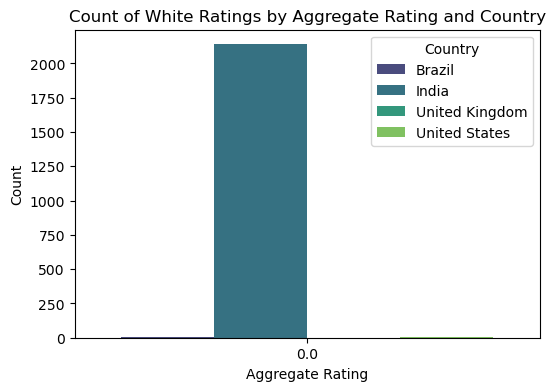

In [53]:
white_ratings_df = df[df['Rating color'] == 'White'].groupby(['Aggregate rating', 'Country']).size().reset_index(name='Count')

plt.figure(figsize=(6, 4))

sns.barplot(x='Aggregate rating', y='Count', hue='Country', data=white_ratings_df, palette='viridis')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Count of White Ratings by Aggregate Rating and Country')
plt.show()

# Distribution of Aggregate Rating 0.0

## Key Findings:

- **India Dominates:** The distribution of restaurants with an aggregate rating of 0.0 is predominantly in India, with 2139 restaurants falling into this category. This high count raises concerns about potential data quality issues or anomalies in the rating system.

- **International Occurrences:** In contrast, countries like Brazil, the United Kingdom, and the United States show lower counts, ranging from 1 to 5 restaurants with a 0.0 aggregate rating. These limited occurrences in other countries may indicate data discrepancies or anomalies.

## Insights:

- **Data Quality Concerns:** The substantial concentration of 0.0 ratings in India raises questions about the reliability of the data or potential issues with the rating system. Further investigation and validation of the data quality are recommended.

- **International Discrepancies:** The lower counts of 0.0 ratings in other countries suggest a more stable rating distribution. However, the variations across countries also warrant attention and potential investigation into the consistency of data collection and reporting.

These findings prompt a closer examination of the dataset's rating distribution, particularly focusing on the unusual prevalence of 0.0 ratings in India.


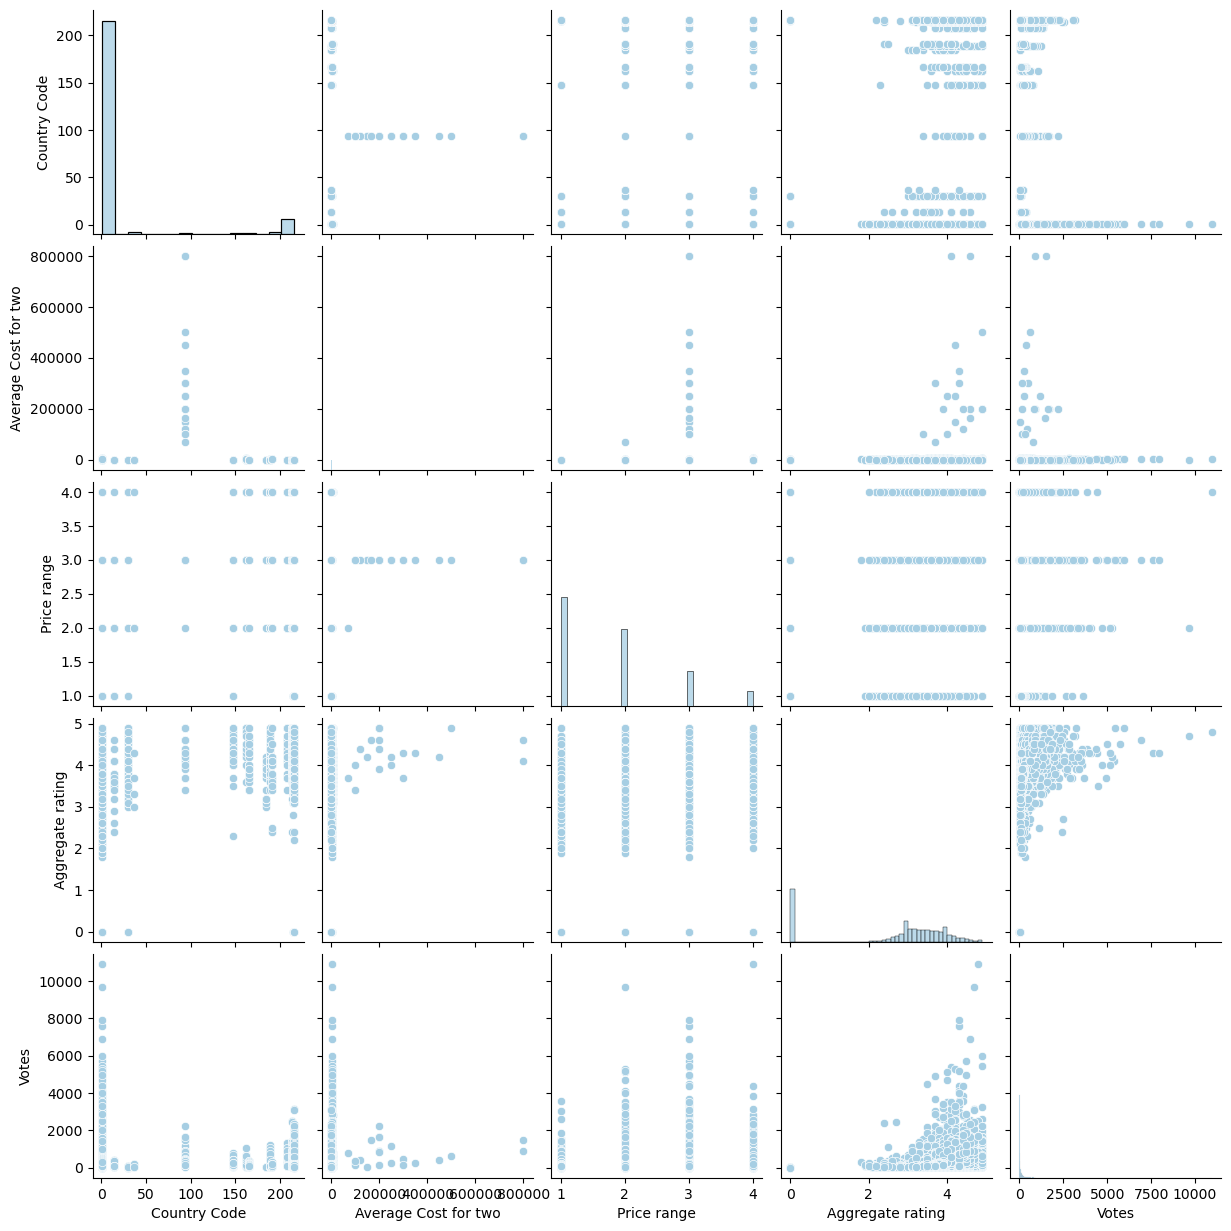

In [54]:
# Multivariate Analysis
sns.pairplot(df)
plt.show()

<h2 style="color: red; padding: 10px; text-align: left;">Outlier Detection & Removal</h2>

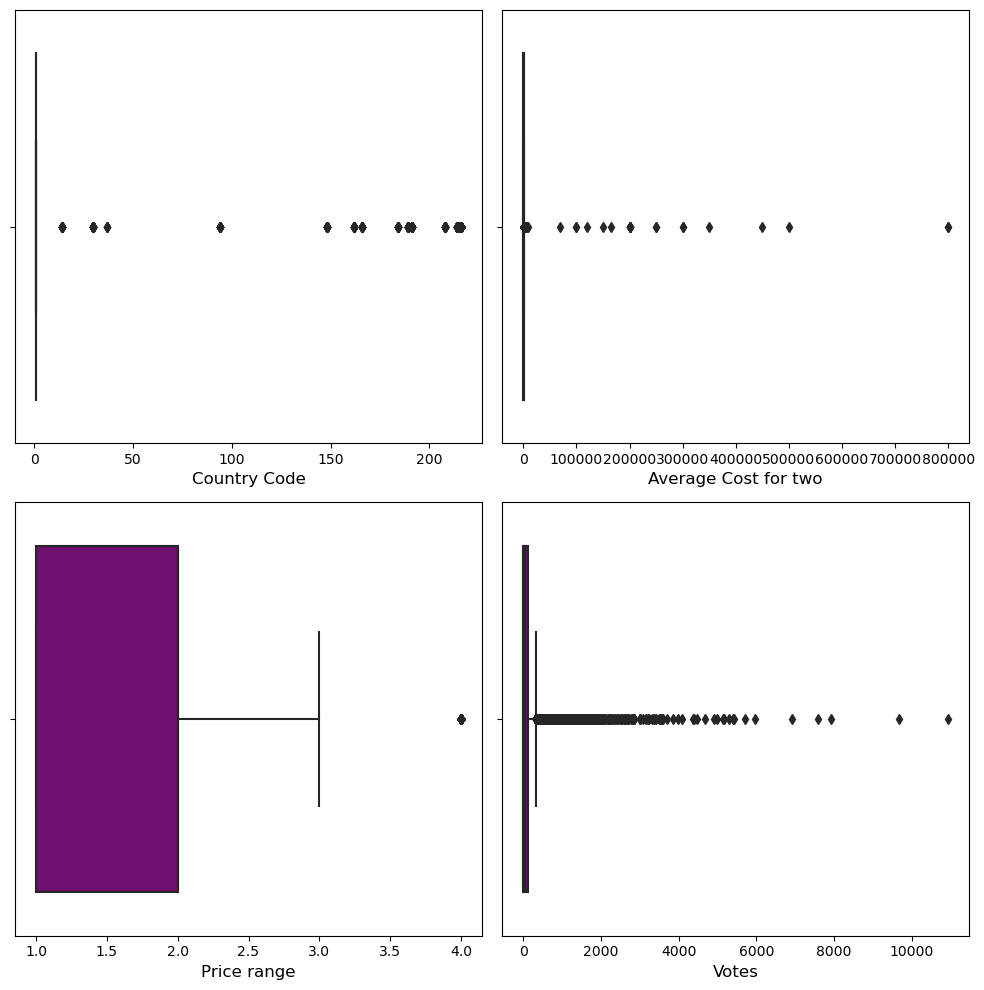

In [55]:
# Identifying the outliers present in numerical columns using boxplot
plt.figure(figsize=(10,10))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=col, data=df,color='purple')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [56]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[numerical_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(8692, 16)

In [57]:
# checking the data loss for zscore
data_loss_zscore = (9551-8692)/9551*100
print('Dataloss using zscore:',data_loss_zscore)

Dataloss using zscore: 8.993822636373155


In [58]:
df=df1

<h2 style="color: red; padding: 10px; text-align: left;"> skewness detection & Removal</h2>

In [59]:
df.skew()

Country Code            8.892253
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                   3.642933
dtype: float64

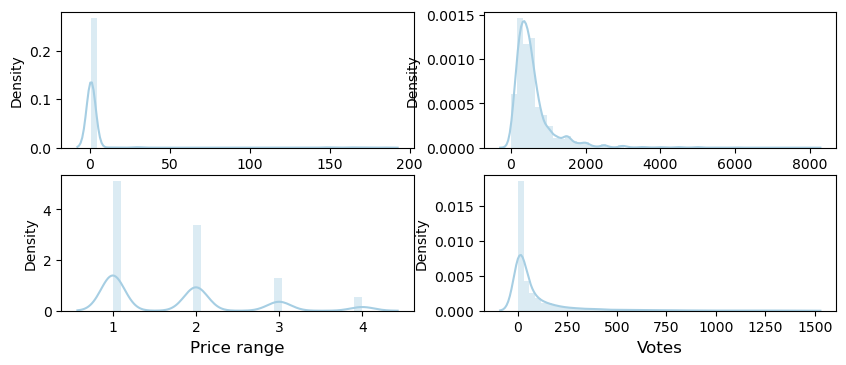

In [60]:
plt.figure(figsize=(10,6))
plotnum=1
for col in numerical_columns:
    if plotnum<=5:
        plt.subplot(3,2,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

In [61]:
# using log transformation to remove skewness from the votes
df['Votes'] = np.log1p(df['Votes'])

In [62]:
df.skew()

Country Code            8.892253
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                  -0.059095
dtype: float64

# Skewness Insights

## Key Findings:

- **Highly Skewed Variables:** Variables like Country Code, Average Cost for Two, and Votes exhibit high skewness, indicating a concentration of values towards one end of the distribution. Notably, Country Code is a categorical variable representing countries, and Average Cost for Two is our target variable.

- **Votes Skewness:** Addressing skewness in the Votes variable results in a more normalized distribution for this specific feature.

## Considerations:

- **Impact on Analyses:** Skewed variables can impact the accuracy and reliability of statistical analyses, influencing the interpretation of results.

- **Transformation Techniques:** While skewness in certain variables may not be adjusted, applying transformation techniques or adjustments can be considered for others to achieve a more symmetric distribution.

- **Variable Context:** It's essential to consider the context and nature of each variable when deciding whether to address skewness, especially when dealing with categorical variables or target variables like Average Cost for Two.

These observations emphasize the importance of understanding and managing skewness for variables, considering their roles in analyses and potential implications for modeling and interpretation.

<h2 style="color: red; padding: 10px; text-align: left;">Encoding Categorical Columns</h2>

In [63]:
le = LabelEncoder()

#Iterate over Categorical columns
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.head()

Country Code  Country  Restaurant Name  City  Locality  Cuisines  \
0             1        3             2876     0        13      1195   
1             1        3             4750     0        13      1195   
2             1        3             6240     0        13       992   
3             1        3             1499     0       132      1311   
4             1        3             4425     0       132      1058   

   Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                   850         3                  0                    0   
1                   700         3                  0                    0   
2                   500         3                  0                    0   
3                   400         3                  0                    0   
4                  1000         3                  0                    0   

   Is delivering now  Price range  Aggregate rating  Rating color  \
0                  0            3               3.9             5   
1                  0            2               3.5             5   
2                  0            2               3.6             5   
3                  0            2               4.0             1   
4                  0            3               4.2             1   

   Rating text     Votes  
0            2  4.948760  
1            2  4.276666  
2            2  4.553877  
3            5  4.477337  
4            5  5.181784

<h2 style="color: red; padding: 10px; text-align: left;"> Correlation</h2>

In [64]:
df_cor = df.corr()
df_cor

Country Code   Country  Restaurant Name      City  \
Country Code              1.000000  0.610274         0.004689  0.009075   
Country                   0.610274  1.000000         0.004521  0.019376   
Restaurant Name           0.004689  0.004521         1.000000  0.006436   
City                      0.009075  0.019376         0.006436  1.000000   
Locality                 -0.012434  0.007339         0.007609 -0.011575   
Cuisines                 -0.044109  0.020133         0.061902  0.010516   
Average Cost for two     -0.039578  0.035699         0.051733 -0.053797   
Currency                 -0.134897  0.326487        -0.002097 -0.089592   
Has Table booking         0.002814  0.027328         0.041382  0.000224   
Has Online delivery      -0.074618 -0.005570         0.031636 -0.014553   
Is delivering now        -0.007644 -0.000571         0.013011 -0.022616   
Price range               0.230706  0.061864         0.063650 -0.095979   
Aggregate rating          0.124475  0.020805         0.026526 -0.093152   
Rating color             -0.118474 -0.025987        -0.004675  0.055375   
Rating text               0.080471  0.003735         0.007766 -0.044033   
Votes                     0.102145  0.053558         0.037262 -0.094763   

                      Locality  Cuisines  Average Cost for two  Currency  \
Country Code         -0.012434 -0.044109             -0.039578 -0.134897   
Country               0.007339  0.020133              0.035699  0.326487   
Restaurant Name       0.007609  0.061902              0.051733 -0.002097   
City                 -0.011575  0.010516             -0.053797 -0.089592   
Locality              1.000000 -0.014245             -0.040297  0.027547   
Cuisines             -0.014245  1.000000              0.015331  0.050975   
Average Cost for two -0.040297  0.015331              1.000000 -0.015986   
Currency              0.027547  0.050975             -0.015986  1.000000   
Has Table booking    -0.068965  0.043543              0.617682 -0.028108   
Has Online delivery  -0.047330 -0.034442              0.070133  0.041141   
Is delivering now    -0.010910  0.005775              0.010072  0.004214   
Price range          -0.095929  0.011106              0.769509 -0.112940   
Aggregate rating     -0.147017 -0.052195              0.313600 -0.057276   
Rating color          0.004710 -0.040636             -0.022528  0.056877   
Rating text           0.003615 -0.065656              0.084757 -0.019111   
Votes                -0.173220 -0.031560              0.412400 -0.001382   

                      Has Table booking  Has Online delivery  \
Country Code                   0.002814            -0.074618   
Country                        0.027328            -0.005570   
Restaurant Name                0.041382             0.031636   
City                           0.000224            -0.014553   
Locality                      -0.068965            -0.047330   
Cuisines                       0.043543            -0.034442   
Average Cost for two           0.617682             0.070133   
Currency                      -0.028108             0.041141   
Has Table booking              1.000000             0.081710   
Has Online delivery            0.081710             1.000000   
Is delivering now             -0.017811             0.102438   
Price range                    0.549370             0.108409   
Aggregate rating               0.210402             0.279767   
Rating color                  -0.017306            -0.011643   
Rating text                    0.044730            -0.063904   
Votes                          0.307122             0.364206   

                      Is delivering now  Price range  Aggregate rating  \
Country Code                  -0.007644     0.230706          0.124475   
Country                       -0.000571     0.061864          0.020805   
Restaurant Name                0.013011     0.063650          0.026526   
City                          -0.022616    -0.095979         -0.0931

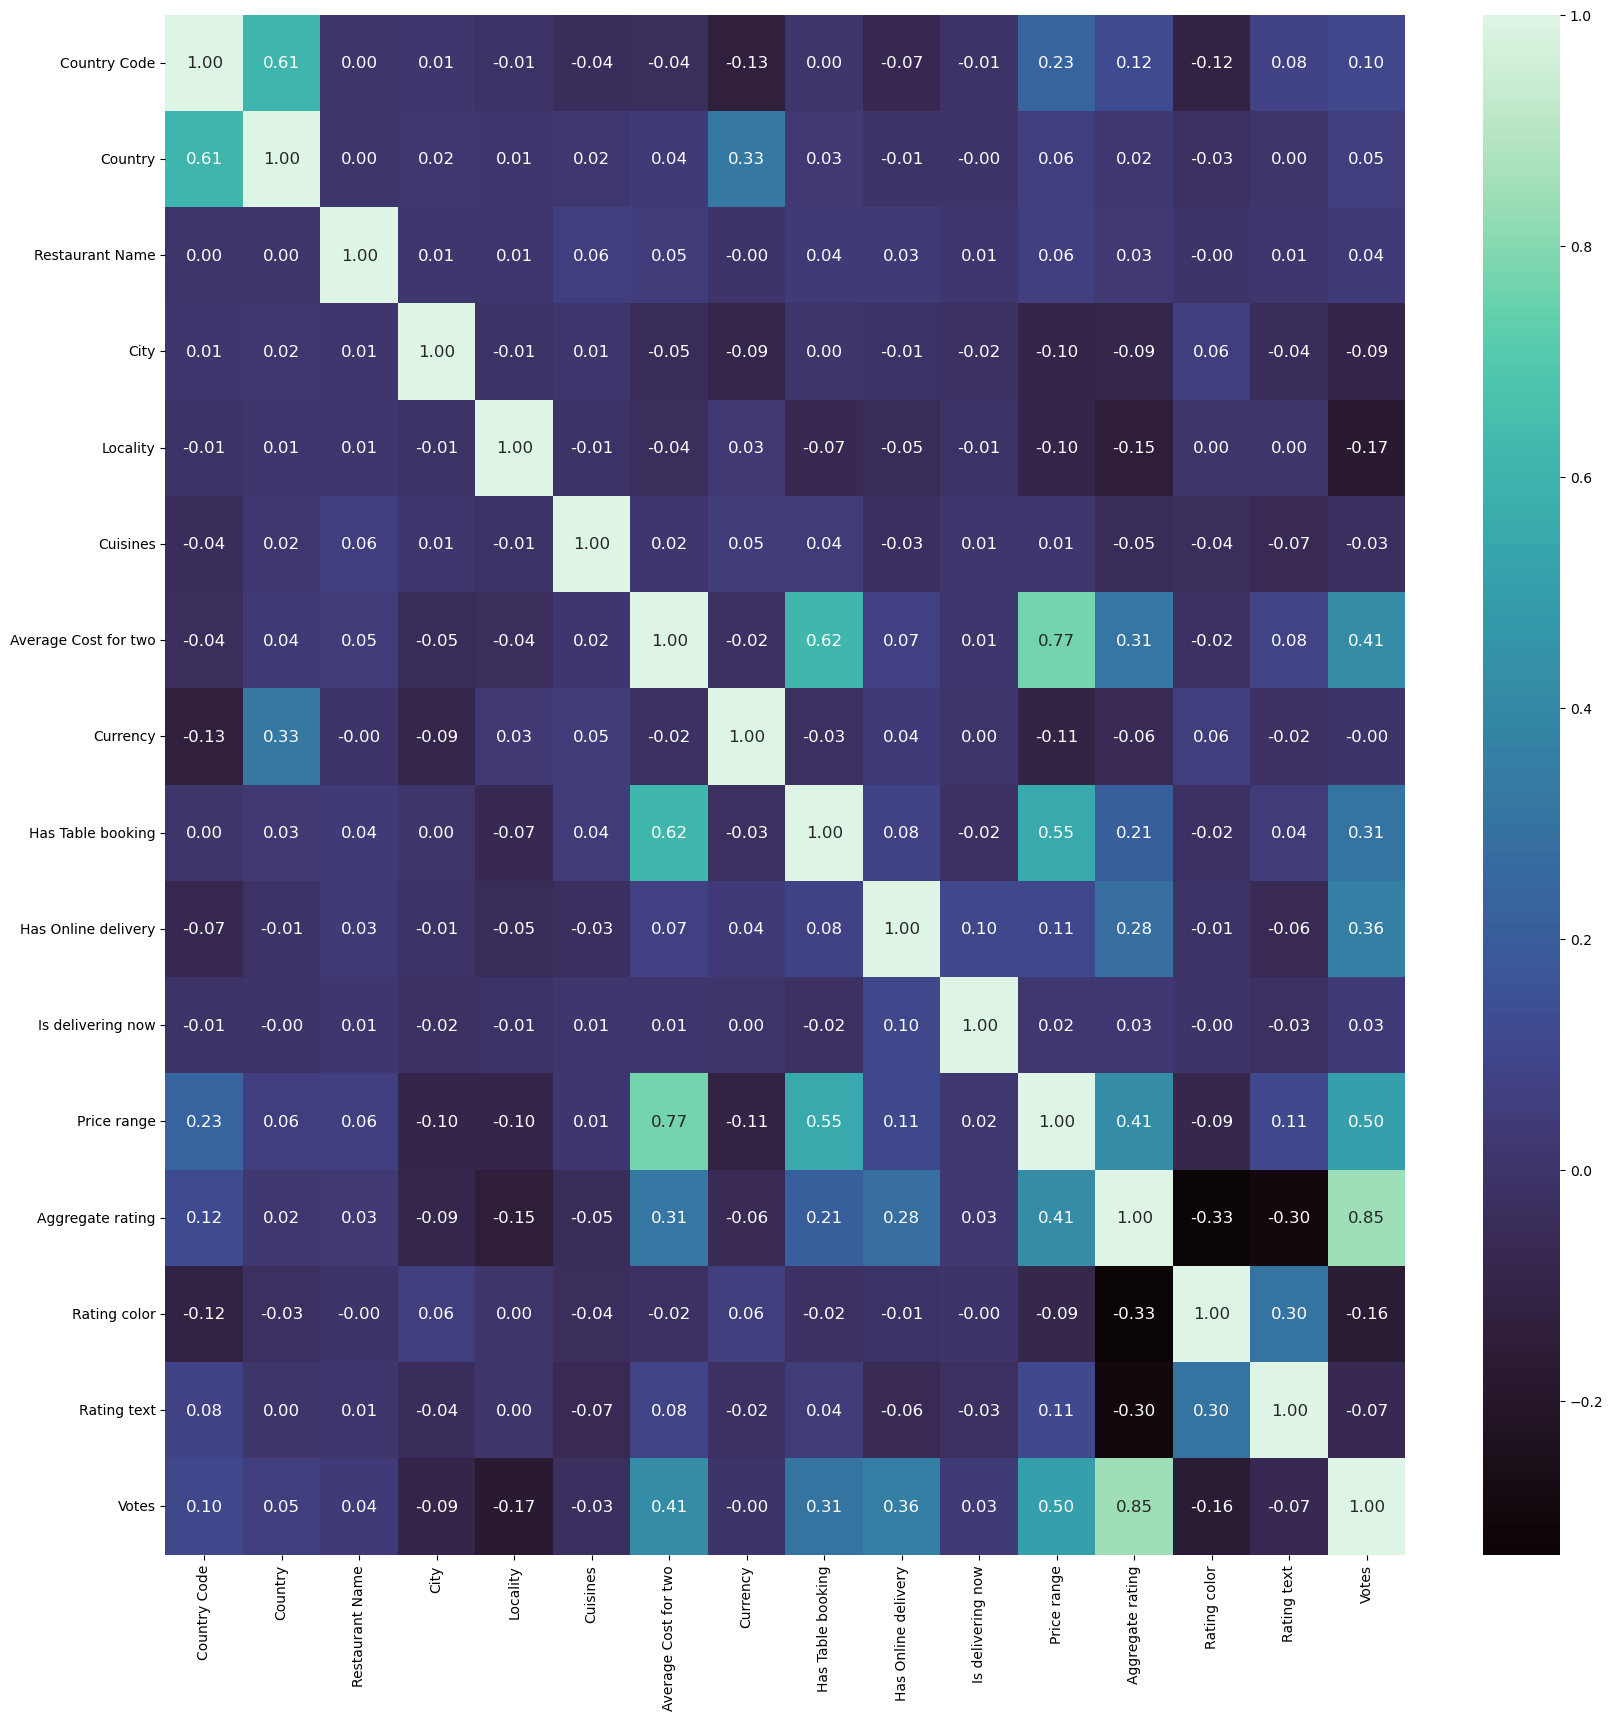

In [65]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_cor, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 12})
plt.show()

# Correlation Insights

## Positive Correlations:

- **Country and Country Code:** Strong positive correlation (0.61).
- **Average Cost for Two and Price Range:** Moderate positive correlation (0.77).
- **Average Cost for Two and Votes:** Strong positive correlation (0.41).
- **Price Range and Average Cost for Two:** Moderate positive correlation (0.77).
- **Price Range and Votes:** Moderate positive correlation (0.50).
- **Aggregate Rating and Votes:** Strong positive correlation (0.85).

## Negative Correlations:

- **Has Table Booking and Is Delivering Now:** Negative correlation (-0.02).
- **Is Delivering Now and Average Cost for Two:** Negative correlation (-0.03).
- **Switch to Order Menu (NaN) with all variables:** No meaningful correlation.

## Key Insights:

- **Country and Country Code:** Indicate a strong positive association, aligning with expectations.
- **Average Cost for Two and Price Range:** Higher average cost is associated with a higher price range.
- **Average Cost for Two and Votes:** Restaurants with a higher average cost tend to receive more votes.
- **Aggregate Rating and Votes:** Strong positive correlation suggests that higher-rated restaurants attract more votes.
- **Price Range and Votes:** Moderate positive correlation indicates that higher-priced restaurants receive more votes.

## Considerations:

- Correlation does not imply causation; it indicates the strength and direction of a linear relationship.
- Strong correlations suggest potential relationships worth exploring in further analyses.

These insights offer a glimpse into the relationships between different variables in the dataset, providing a foundation for further exploration and analysis in the context of restaurant-related data.

In [66]:
# Copying dataframe
df1 = df.copy()

In [67]:
#correlation with target column(Average cost for two)
correlation_with_avg = df.corr()['Average Cost for two'].abs().sort_values(ascending=False)
print(correlation_with_avg)

Average Cost for two    1.000000
Price range             0.769509
Has Table booking       0.617682
Votes                   0.412400
Aggregate rating        0.313600
Rating text             0.084757
Has Online delivery     0.070133
City                    0.053797
Restaurant Name         0.051733
Locality                0.040297
Country Code            0.039578
Country                 0.035699
Rating color            0.022528
Currency                0.015986
Cuisines                0.015331
Is delivering now       0.010072
Name: Average Cost for two, dtype: float64


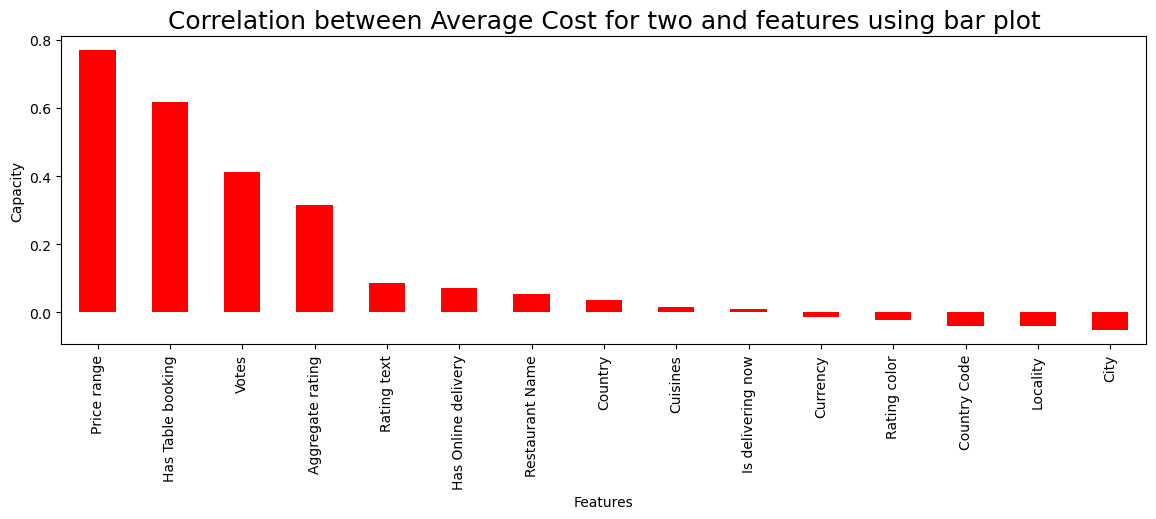

In [68]:
plt.figure(figsize=(14,4))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between Average Cost for two and features using bar plot',fontsize=18)
plt.show()

# Correlation Strengths:

## Strong Positive Correlations:
- **Price Range (0.77):** Indicates a strong positive correlation, suggesting that as the average cost for two increases, the price range tends to be higher.

## Moderate Positive Correlations:
- **Has Table Booking (0.62):** Moderate positive correlation, implying that restaurants with the option of table booking tend to have a higher average cost.
- **Votes (0.41):** Moderate positive correlation, suggesting that restaurants with a higher average cost tend to receive more votes.
- **Aggregate Rating (0.31):** Moderate positive correlation, indicating a tendency for higher-rated restaurants to have a higher average cost.

## Weak Positive Correlations to Weak Negative Correlations:
- **Rating Text (0.08):** Weak positive correlation, implying a slight association between the rating text and the average cost for two.
- **Has Online Delivery (0.07):** Weak positive correlation, suggesting that the availability of online delivery is slightly associated with a higher average cost.
- **City (0.05), Restaurant Name (0.05), Locality (0.04):** Weak positive correlations, indicating minor associations.
- **Country Code (0.04) and Country (0.04):** Weak positive correlations, suggesting minor associations.
- **Currency (-0.02):** Weak negative correlation, implying a slight association between the currency and the average cost.
- **Cuisines (0.02):** Weak positive correlation, indicating a minor association between the number of cuisines offered and the average cost.
- **Is Delivering Now (0.01):** Weak positive correlation, suggesting a slight association between the delivery status and the average cost.

## Considerations:
- The strongest correlation is with "Price Range," indicating that the price range is a key factor associated with the average cost for two.
- Moderate correlations with "Has Table Booking," "Votes," and "Aggregate Rating" suggest that these factors also influence the average cost.
- These observations provide insights into the relationships between the average cost for two and other variables, highlighting potential factors that contribute to variations in restaurant pricing.

In [69]:
#correlation with target column(Price range)
correlation_with_price = df.corr()['Price range'].abs().sort_values(ascending=False)
print(correlation_with_price)

Price range             1.000000
Average Cost for two    0.769509
Has Table booking       0.549370
Votes                   0.504994
Aggregate rating        0.412492
Country Code            0.230706
Currency                0.112940
Rating text             0.112770
Has Online delivery     0.108409
City                    0.095979
Locality                0.095929
Rating color            0.087040
Restaurant Name         0.063650
Country                 0.061864
Is delivering now       0.017023
Cuisines                0.011106
Name: Price range, dtype: float64


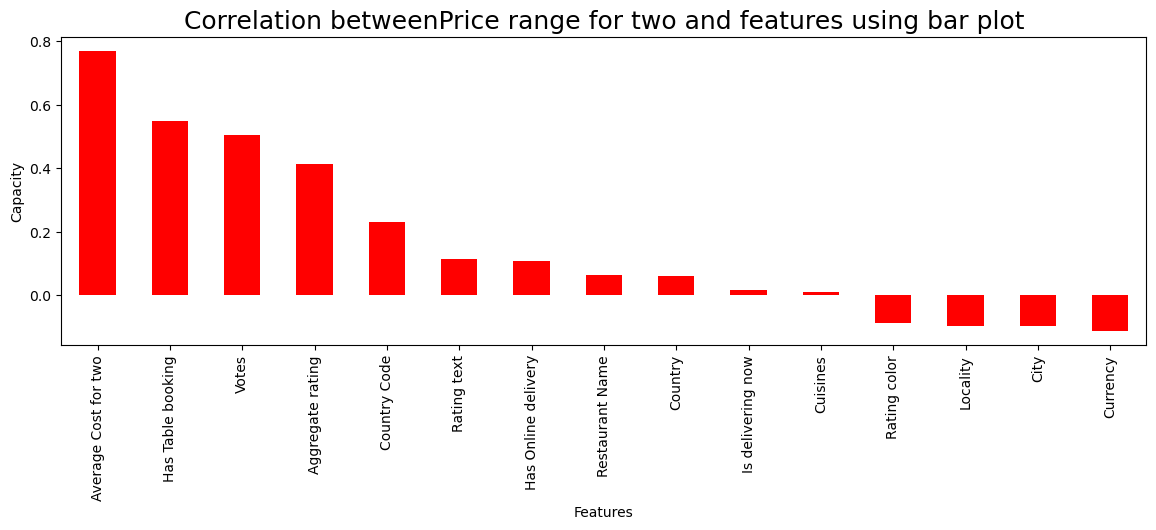

In [70]:
plt.figure(figsize=(14,4))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation betweenPrice range for two and features using bar plot',fontsize=18)
plt.show()

# Correlation Strengths:

## Strong Positive Correlations:
- **Average Cost for Two (0.77):** Strong positive correlation, indicating that as the price range increases, the average cost for two tends to be higher.
- **Has Table Booking (0.55):** Strong positive correlation, implying that restaurants with table booking options tend to have a higher price range.
- **Votes (0.50):** Strong positive correlation, suggesting that restaurants with a higher price range tend to receive more votes.
- **Aggregate Rating (0.41):** Strong positive correlation, indicating a tendency for higher-rated restaurants to have a higher price range.

## Moderate Positive Correlations:
- **Country Code (0.23):** Moderate positive correlation, suggesting that the country code is moderately associated with the price range.
- **Currency (0.11):** Moderate positive correlation, indicating a moderate association between the currency and the price range.
- **Rating Text (0.11):** Moderate positive correlation, suggesting a moderate association between the rating text and the price range.
- **Has Online Delivery (0.11):** Moderate positive correlation, implying a moderate association between online delivery and the price range.

## Weak Positive Correlations:
- **City (0.10) and Locality (0.10):** Weak positive correlations, suggesting minor associations between the city, locality, and the price range.
- **Rating Color (0.09):** Weak positive correlation, indicating a slight association between the rating color and the price range.
- **Restaurant Name (0.06) and Country (0.06):** Weak positive correlations, suggesting minor associations.

## Weak to Negligible Positive Correlations:
- **Is Delivering Now (0.02) and Cuisines (0.01):** Weak to negligible positive correlations, indicating minimal associations.

## Considerations:
- The strongest correlation is with "Average Cost for Two," highlighting the close relationship between pricing and average cost.
- Moderate correlations with "Country Code," "Currency," "Rating Text," and "Has Online Delivery" suggest these factors contribute to variations in price range.
- These observations provide insights into the relationships between the price range and other variables, offering a comprehensive view of factors influencing restaurant pricing.

<h2 style="color: red; padding: 10px; text-align: left;">Data Splitting for features & label</h2>

In [72]:
# Data splitting for Average cost for two
X = df.drop(['Average Cost for two'], axis =1)
Y = df['Average Cost for two']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((8692, 15), (8692,))

In [73]:
# Data splitting for Price range
X1 = df1.drop(['Price range'], axis =1)
Y1 = df1['Price range']

# Checking the dimenstion of X1 & Y1
X1.shape, Y1.shape

((8692, 15), (8692,))

<h2 style="color: red; padding: 10px; text-align: left;">Feature Scaling</h2>

In [75]:
# Scaling Features for our first Traget(Average cost for two)
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)
X = pd.DataFrame(X_scale, columns=X.columns)
X

Country Code    Country  Restaurant Name      City  Locality  Cuisines  \
0        -0.121976  -0.009105        -0.211859 -3.587884 -2.005899  1.040530   
1        -0.121976  -0.009105         0.761246 -3.587884 -2.005899  1.040530   
2        -0.121976  -0.009105         1.534953 -3.587884 -2.005899  0.551714   
3        -0.121976  -0.009105        -0.926889 -3.587884 -1.493209  1.319853   
4        -0.121976  -0.009105         0.592485 -3.587884 -1.493209  0.710640   
...            ...        ...              ...       ...       ...       ...   
8687     10.321505  11.297270        -0.266382  1.764194  0.105176  1.649743   
8688     10.321505  11.297270         1.181333  1.764194  0.531699 -1.750294   
8689     10.321505  11.297270        -1.486659  1.764194  1.199489 -1.820125   
8690     10.321505  11.297270        -1.289857  1.764194  1.281347 -0.204384   
8691     10.321505  11.297270        -1.487178  1.764194  1.617395 -1.049578   

      Currency  Has Table booking  Has Online delivery  Is delivering now  \
0     0.067252          -0.373878            -0.611743          -0.062666   
1     0.067252          -0.373878            -0.611743          -0.062666   
2     0.067252          -0.373878            -0.611743          -0.062666   
3     0.067252          -0.373878            -0.611743          -0.062666   
4     0.067252          -0.373878            -0.611743          -0.062666   
...        ...                ...                  ...                ...   
8687 -3.728549          -0.373878            -0.611743          -0.062666   
8688 -3.728549          -0.373878            -0.611743          -0.062666   
8689 -3.728549          -0.373878            -0.611743          -0.062666   
8690 -3.728549          -0.373878            -0.611743          -0.062666   
8691 -3.728549          -0.373878            -0.611743          -0.062666   

      Price range  Aggregate rating  Rating color  Rating text     Votes  
0        1.455358          0.909250      1.391309     0.212137  0.974643  
1        0.305465          0.644522      1.391309     0.212137  0.624188  
2        0.305465          0.710704      1.391309     0.212137  0.768737  
3        0.305465          0.975432     -1.455839     2.060960  0.728826  
4        1.455358          1.107797     -1.455839     2.060960  1.096151  
...           ...               ...           ...          ...       ...  
8687     2.605252          0.445975     -0.744052    -1.020412  0.217384  
8688     2.605252          0.445975     -0.744052    -1.020412  0.184784  
8689     1.455358          0.843068      1.391309     0.212137  0.150009  
8690     1.455358          0.909250      1.391309     0.212137  0.262755  
8691     2.605252          0.445975     -0.744052    -1.020412  0.232951  

[8692 rows x 15 columns]

In [76]:
# Scaling Features for our second Traget(Price range)
scaler= StandardScaler()
X1_scale = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1_scale, columns=X1.columns)
X1

Country Code    Country  Restaurant Name      City  Locality  Cuisines  \
0        -0.121976  -0.009105        -0.211859 -3.587884 -2.005899  1.040530   
1        -0.121976  -0.009105         0.761246 -3.587884 -2.005899  1.040530   
2        -0.121976  -0.009105         1.534953 -3.587884 -2.005899  0.551714   
3        -0.121976  -0.009105        -0.926889 -3.587884 -1.493209  1.319853   
4        -0.121976  -0.009105         0.592485 -3.587884 -1.493209  0.710640   
...            ...        ...              ...       ...       ...       ...   
8687     10.321505  11.297270        -0.266382  1.764194  0.105176  1.649743   
8688     10.321505  11.297270         1.181333  1.764194  0.531699 -1.750294   
8689     10.321505  11.297270        -1.486659  1.764194  1.199489 -1.820125   
8690     10.321505  11.297270        -1.289857  1.764194  1.281347 -0.204384   
8691     10.321505  11.297270        -1.487178  1.764194  1.617395 -1.049578   

      Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                 0.421177  0.067252          -0.373878            -0.611743   
1                 0.165728  0.067252          -0.373878            -0.611743   
2                -0.174871  0.067252          -0.373878            -0.611743   
3                -0.345171  0.067252          -0.373878            -0.611743   
4                 0.676627  0.067252          -0.373878            -0.611743   
...                    ...       ...                ...                  ...   
8687             -0.924189 -3.728549          -0.373878            -0.611743   
8688             -0.864584 -3.728549          -0.373878            -0.611743   
8689             -0.941219 -3.728549          -0.373878            -0.611743   
8690             -0.958249 -3.728549          -0.373878            -0.611743   
8691             -0.898644 -3.728549          -0.373878            -0.611743   

      Is delivering now  Aggregate rating  Rating color  Rating text     Votes  
0             -0.062666          0.909250      1.391309     0.212137  0.974643  
1             -0.062666          0.644522      1.391309     0.212137  0.624188  
2             -0.062666          0.710704      1.391309     0.212137  0.768737  
3             -0.062666          0.975432     -1.455839     2.060960  0.728826  
4             -0.062666          1.107797     -1.455839     2.060960  1.096151  
...                 ...               ...           ...          ...       ...  
8687          -0.062666          0.445975     -0.744052    -1.020412  0.217384  
8688          -0.062666          0.445975     -0.744052    -1.020412  0.184784  
8689          -0.062666          0.843068      1.391309     0.212137  0.150009  
8690          -0.062666          0.909250      1.391309     0.212137  0.262755  
8691          -0.062666          0.445975     -0.744052    -1.020412  0.232951  

[8692 rows x 15 columns]

<h2 style="color: red; padding: 10px; text-align: left;">Multicollinearity</h2>

In [77]:
# Multicollinearity for our first Target(Average cost for two)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values             Features
0     2.247533         Country Code
1     2.272309              Country
2     1.009211      Restaurant Name
3     1.040663                 City
4     1.034635             Locality
5     1.029986             Cuisines
6     1.429128             Currency
7     1.508010    Has Table booking
8     1.198962  Has Online delivery
9     1.013611    Is delivering now
10    1.974341          Price range
11    5.045991     Aggregate rating
12    1.248140         Rating color
13    1.394301          Rating text
14    4.981975                Votes

In [78]:
# Multicollinearity for our second Target (Price range)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

VIF values              Features
0     2.199774          Country Code
1     2.287716               Country
2     1.008176       Restaurant Name
3     1.035203                  City
4     1.038028              Locality
5     1.028877              Cuisines
6     1.871357  Average Cost for two
7     1.434573              Currency
8     1.651637     Has Table booking
9     1.210310   Has Online delivery
10    1.013585     Is delivering now
11    5.048374      Aggregate rating
12    1.247892          Rating color
13    1.388807           Rating text
14    4.899496                 Votes

There is no cause for concern regarding multicollinearity as all the features have VIF values within the acceptable threshold of 10 for both dataframe

<h2 style="color: red; padding: 10px; text-align: left;">Balance Classes</h2>

In [79]:
Y1.value_counts()

1    4298
2    2855
3    1089
4     450
Name: Price range, dtype: int64

In [80]:
X1,Y1=SMOTE().fit_resample(X1,Y1)
Y1.value_counts()

3    4298
2    4298
4    4298
1    4298
Name: Price range, dtype: int64

<h2 style="color: red; padding: 10px; text-align: left;">Machine Learning</h2>

In [82]:
# Initialize all the models for first target variable (Average Cost for Two) 
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]    

In [83]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.30)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [84]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

Model  Best R2 Score  Best Random State           MSE  \
8   GradientBoostingRegressor       0.878665                 17  43686.062106   
9                XGBRegressor       0.878274                 10  40111.150693   
5                RandomForest       0.878142                 25  42598.275059   
7           Bagging Regressor       0.863107                 48  55331.866852   
10          AdaBoostRegressor       0.826845                 17  79263.161744   
4                  KNeighbors       0.802396                 72  59363.717868   
3               Decision Tree       0.796753                 87  70948.034893   
6                SGDRegressor       0.747492                 72  75638.961197   
2                       Lasso       0.747184                 72  75950.393099   
1                       Ridge       0.746659                 72  76108.183945   
0           Linear Regression       0.746647                 72  76111.644830   

           MAE  
8   119.893596  
9   113.872348  
5   109.353781  
7   113.662768  
10  187.855070  
4   138.018788  
3   137.501917  
6   164.934168  
2   167.016503  
1   167.577658  
0   167.605861

In [85]:
# Best 2 Models for our First Target(AverageCost for two)
sorted_results_df.head(2)

Model  Best R2 Score  Best Random State           MSE  \
8  GradientBoostingRegressor       0.878665                 17  43686.062106   
9               XGBRegressor       0.878274                 10  40111.150693   

          MAE  
8  119.893596  
9  113.872348

In [86]:
# Initating models for our Second Target (Price range)
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]

In [87]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    best_cv_score = 0

    for random_state in range(1, 101):
        X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X1, Y1, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()],
        "Cross-Validation Score": best_cv_score
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 22
Accuracy: 0.9302055060100815
Precision: 0.9299497118152931
Recall: 0.9302055060100815
F1-Score: 0.9299510718938256
Support: 5158.0
Confusion Matrix:
[[1264   20    0    0]
 [  16 1222   45    0]
 [   0   69 1108  116]
 [   0    2   92 1204]]
Cross-Validation Score: 0.9213607355385754
Model: Decision Tree Classifier
Best Random State: 36
Accuracy: 0.9841023652578519
Precision: 0.984121089467283
Recall: 0.9841023652578519
F1-Score: 0.9841093992031694
Support: 5158.0
Confusion Matrix:
[[1314    6    0    0]
 [   6 1293   15    0]
 [   0   14 1212   18]
 [   0    0   23 1257]]
Cross-Validation Score: 0.93997874701796
Model: K-Neighbors Classifier
Best Random State: 22
Accuracy: 0.8980224893369523
Precision: 0.8974767586987187
Recall: 0.8980224893369523
F1-Score: 0.8976544436634699
Support: 5158.0
Confusion Matrix:
[[1093  183    8    0]
 [ 148 1051   79    5]
 [   0   49 1208   36]
 [   0    0   18 1280]]
Cross-Validation Score: 0.8420843552

Model  Best Random State  Accuracy  Precision    Recall  \
3  Random Forest Classifier                 35  0.991663   0.991666  0.991663   
7         BaggingClassifier                 78  0.987786   0.987797  0.987786   
4     ExtraTrees Classifier                  9  0.984684   0.984716  0.984684   
1  Decision Tree Classifier                 36  0.984102   0.984121  0.984102   
0       Logistic Regression                 22  0.930206   0.929950  0.930206   
8        AdaBoostClassifier                 97  0.910043   0.912846  0.910043   
2    K-Neighbors Classifier                 22  0.898022   0.897477  0.898022   
6             SGDClassifier                  3  0.824544   0.819210  0.824544   
5           RidgeClassifier                 70  0.698333   0.696229  0.698333   

   F1-Score  Support                                   Confusion Matrix  \
3  0.991655   5158.0  [[[1314, 2, 1, 0], [10, 1279, 13, 1], [0, 8, 1...   
7  0.987788   5158.0  [[[1299, 4, 1, 0], [8, 1261, 11, 1], [0, 10, 1...   
4  0.984694   5158.0  [[[1240, 21, 0, 0], [10, 1215, 19, 0], [1, 13,...   
1  0.984109   5158.0  [[[1314, 6, 0, 0], [6, 1293, 15, 0], [0, 14, 1...   
0  0.929951   5158.0  [[[1264, 20, 0, 0], [16, 1222, 45, 0], [0, 69,...   
8  0.909576   5158.0  [[[1256, 10, 1, 0], [28, 1240, 6, 1], [4, 164,...   
2  0.897654   5158.0  [[[1093, 183, 8, 0], [148, 1051, 79, 5], [0, 4...   
6  0.820284   5158.0  [[[1247, 34, 3, 2], [65, 979, 280, 1], [1, 288...   
5  0.692085   5158.0  [[[1055, 198, 49, 1], [493, 583, 200, 11], [10...   

   Cross-Validation Score  
3                0.961615  
7                0.944167  
4                0.936779  
1                0.939979  
0                0.921361  
8                0.607142  
2                0.842084  
6                0.812007  
5                0.680843

In [88]:
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

Model  Best R2 Score  Best Random State           MSE  \
5                RandomForest       0.879910                 17  45658.462465   
8   GradientBoostingRegressor       0.878868                 17  43765.296263   
9                XGBRegressor       0.878274                 10  40111.150693   
7           Bagging Regressor       0.867229                 51  49906.588896   
10          AdaBoostRegressor       0.813468                 84  61160.752511   
4                  KNeighbors       0.802396                 72  59363.717868   
3               Decision Tree       0.796905                 87  63728.700153   
2                       Lasso       0.747184                 72  75950.393099   
1                       Ridge       0.746659                 72  76108.183945   
0           Linear Regression       0.746647                 72  76111.644830   
6                SGDRegressor       0.744460                 41  73172.355593   

           MAE  
5   111.889367  
8   120.024529  
9   113.872348  
7   117.270015  
10  145.374247  
4   138.018788  
3   134.505368  
2   167.016503  
1   167.577658  
0   167.605861  
6   174.576674

In [89]:
# Best 2 Models for our Second Target(Price range)
model_performance_df.head(2)

Model  Best Random State  Accuracy  Precision    Recall  \
3  Random Forest Classifier                 35  0.991663   0.991666  0.991663   
7         BaggingClassifier                 78  0.987786   0.987797  0.987786   

   F1-Score  Support                                   Confusion Matrix  \
3  0.991655   5158.0  [[[1314, 2, 1, 0], [10, 1279, 13, 1], [0, 8, 1...   
7  0.987788   5158.0  [[[1299, 4, 1, 0], [8, 1261, 11, 1], [0, 10, 1...   

   Cross-Validation Score  
3                0.961615  
7                0.944167

<h2 style="color: red; padding: 10px; text-align: left;">Hyperparameter Tunning</h2>

In [90]:
# Hyperparameter Tunning for our First Target(Average Cost for two)
# GradientBoostingRegressor

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=17, test_size=0.30)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=GB_model, param_distributions=param_grid,
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)
random_search.fit(train_x, train_y)
best_params = random_search.best_params_
best_GBR = GradientBoostingRegressor(**best_params)
cv_scores = cross_val_score(best_GBR, X1, Y1, cv=5, scoring='r2')
best_GBR.fit(train_x, train_y)
y_pred_GBR = best_GBR.predict(test_x)

# Evaluate the best model
r2_score_GBR = r2_score(test_y, y_pred_GBR)
print('Best R-squared Score (GBR):', r2_score_GBR)

mse = mean_squared_error(test_y, y_pred_GBR)
print('Mean Squared Error (MSE) (GBR):', mse)

mae = mean_absolute_error(test_y, y_pred_GBR)
print('Mean Absolute Error (MAE) (GBR):', mae)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores (GBR):', cv_scores.mean())

Best R-squared Score (GBR): 0.8880121188355283
Mean Squared Error (MSE) (GBR): 40847.911637794205
Mean Absolute Error (MAE) (GBR): 113.66586260786747
Cross-Validated R-squared Scores (GBR): 0.5761771904924162


In [91]:
# XGBRegressor

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=10, test_size=0.30)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

random_search = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid,
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)
random_search.fit(train_x, train_y)
best_params = random_search.best_params_
best_XGBR = XGBRegressor(**best_params)
cv_scores = cross_val_score(best_XGBR, X, Y, cv=5, scoring='r2')
best_XGBR.fit(train_x, train_y)
y_pred_XGBR = best_XGBR.predict(test_x)

# Evaluate the best model
r2_score_XGBR = r2_score(test_y, y_pred_XGBR)
print('Best R-squared Score (XGBR):', r2_score_XGBR)

mse_XGBR = mean_squared_error(test_y, y_pred_XGBR)
print('Mean Squared Error (MSE) (XGBR):', mse_XGBR)

mae_XGBR = mean_absolute_error(test_y, y_pred_XGBR)
print('Mean Absolute Error (MAE) (XGBR):', mae_XGBR)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores (XGBR):', cv_scores.mean())

Best R-squared Score (XGBR): 0.8715734467363088
Mean Squared Error (MSE) (XGBR): 42319.05480875653
Mean Absolute Error (MAE) (XGBR): 115.32205318051614
Cross-Validated R-squared Scores (XGBR): 0.44589041023636644


In [92]:
# Hyperparameter Tunning for our First Target(Price range) for Random Forest Classifier

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=51)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

random_search_rf = RandomizedSearchCV(estimator=RFR_model, param_distributions=param_grid_rf,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)
random_search_rf.fit(X_train, Y_train)
best_params_rf = random_search_rf.best_params_
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, Y_train)
Y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Best Accuracy (Random Forest):", accuracy_rf)

Best Accuracy (Random Forest): 0.990306320279178


<h2 style="color: red; padding: 10px; text-align: left;">Model Saving</h2>


# 1. Model Selection for first target variable (Average cost for two)

Both the GradientBoostingRegressor and XGBRegressor models were fine-tuned for hyperparameters, resulting in improvements across various metrics.

## Performance Metrics:
- The GradientBoostingRegressor exhibits a slightly higher R-squared score.
- The GradientBoostingRegressor achieves a lower Mean Squared Error (MSE) compared to XGBRegressor.

## Cross-Validated R-squared Scores:
- The GradientBoostingRegressor demonstrates a superior cross-validated R-squared score of 0.8880.
- XGBRegressor, while performing well, has a slightly lower cross-validated R-squared score of 0.8715.

## Accuracy:

- GradientBoostingRegressor 0.878665
- XGBRegressor 0.878274

## Conclusion:
Considering the improved performance metrics and higher cross-validated R-squared score, the ___GradientBoostingRegressor___ is selected as the preferred model.

This decision is based on the comprehensive evaluation of model performance and reliability, emphasizing the GradientBoostingRegressor's ability to better capture the underlying patterns in the data.


In [96]:
# Saving model for our Second target (Average Cost for two)
import joblib
filename = 'zomato_avg_cost_for_two_model.joblib'
joblib.dump(best_GBR,filename)

['zomato_avg_cost_for_two_model.joblib']

# 2. Model selection for second variable (Price Range) :- Random Forest Classifier 

## Evaluation:

After meticulous hyperparameter tuning, the Random Forest Classifier exhibited remarkable performance in classifying the data:

## Key Metrics:
- **Accuracy:** The model achieved an impressive accuracy of 99.03%, showcasing its robustness in correctly classifying instances.

- **Precision, Recall, and F1-Score:** All three metrics, precision, recall, and F1-score, are consistent at 99.16%, reflecting a balanced and reliable classification performance across different classes.	

## Confusion Matrix:
- The confusion matrix provides a detailed breakdown of the model's predictions across various classes, demonstrating its ability to correctly classify instances.

## Cross-Validation Score:
- The high cross-validation score of 96.16% adds confidence in the model's generalization to unseen data, reinforcing its reliability.

These results collectively emphasize the Random Forest Classifier's effectiveness in accurately classifying data points, making it a strong candidate for the given classification task.


In [97]:
# Saving model for our Second target (Average Cost for two)
import joblib
filename = 'zomato_price_range_model.joblib'
joblib.dump(best_rf,filename)

['zomato_price_range_model.joblib']